### Importing necessary Libraries

In [127]:
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.decomposition import NMF
import matplotlib.pyplot as plt
import seaborn as sns
import tomotopy as tp
import neattext as nt


In [128]:
# if you have not installed these libraries first install these libraries on your system

### Reading the Dataset

In [73]:
df = pd.read_excel("reviews.xlsx")

In [74]:
df[df['Review Text'].isnull()]

Review Text        Date      Reviewer Name   Age range  Gender  \
45          NaN    8/9/2013               ozie  75 or over  Female   
48          NaN   7/10/2013          Anonymous  75 or over    Male   
62          NaN   3/21/2013          Anonymous       65-74  Female   
67          NaN   2/12/2013               bill       55-64    Male   
73          NaN  12/30/2012             bernie       65-74    Male   
..          ...         ...                ...         ...     ...   
594         NaN   11/2/2007             elijah       45-54    Male   
595         NaN   11/1/2007          Anonymous         NaN     NaN   
597         NaN  10/30/2007          Anonymous       35-44  Female   
600         NaN  10/22/2007          Anonymous       19-24    Male   
613         NaN   9/21/2007  [email protected]       25-34  Female   

                          Medication Timeline Patient Status  \
45            On medication for 1 to 6 months        Patient   
48   On medication for 1 to less than 2 years        Patient   
62   On medication for 1 to less than 2 years        Patient   
67            On medication for 1 to 6 months            NaN   
73            On medication for 1 to 6 months        Patient   
..                                        ...            ...   
594  On medication for 1 to less than 2 years        Patient   
595                                       NaN            NaN   
597        On medication for 10 years or more        Patient   
600  On medication for 2 to less than 5 years        Patient   
613           On medication for 1 to 6 months        Patient   

                                             Condition  Overall Rating  \
45                                  Blood Clot in Lung             3.7   
48   Heart Failure with Paroxysmal Atrial Fibrillation             2.7   
62   Heart Failure with Paroxysmal Atrial Fibrillation             4.7   
67                           Blood Clot in a Deep Vein             3.0   
73   Heart Failure with Paroxysmal Atrial Fibrillation             2.7   
..                                                 ...             ...   
594  Blood Clots in Deep Veins and in Blood Vessel ...             3.7   
595                          Blood Clot in a Deep Vein             3.3   
597                                         Blood Clot             4.7   
600                                         Blood Clot             4.7   
613                                 Blood Clot in Lung             5.0   

     Effectiveness Rating  Ease Of Use Rating  Satisfaction Rating  Thumbs Up  \
45                      3                   5                    3          3   
48                      3                   3                    2          0   
62                      5                   5                    4          0   
67                      3                   3                    3          0   
73                      3                   4                    1          0   
..                    ...                 ...                  ...        ...   
594                     4                   3                    4          4   
595                     3                   4                    3          3   
597                     5                   4                    5          2   
600                     5                   4                    5          2   
613                     5                   5                    5         16   

     Thumbs Down  Total Thumbs/Votes  
45             3                   0  
48             0                   0  
62             0                   0  
67             0                   0  
73             0                   0  
..           ...                 ...  
594            3                   1  
595            2                   1  
597            3                  -1  
600            2                   0  
613            3                  13  

[103 rows x 15 columns]

### Data Preprocessing 

In [75]:
# Remove NaN values from 'Review Text' column
df = df.dropna(subset=['Review Text', 'Medication Timeline','Gender'])

In [76]:
# Define stop words
stop_words = set(stopwords.words('english'))

In [77]:
# Tokenization and stop words removal
df['Cleaned Text'] = df['Review Text'].apply(lambda x: ' '.join([word.lower() for word in word_tokenize(str(x)) if word.isalpha() and word.lower() not in stop_words]))

In [78]:
# Display the cleaned data
print(df[['Review Text', 'Cleaned Text']].head())

                                         Review Text  \
0  Headache,gum pain,nausea,muscle pain,hair loss...   
1  This is rat poison, this drug shouldn't be con...   
2  I’m a 35yr old female that has been on Coumadi...   
4  Well today I start this drug and I am very sca...   
5  My mother had two blood clots in 2012.  One in...   

                                        Cleaned Text  
0  headache gum pain nausea muscle pain hair loss...  
1  rat poison drug considered given anymore heada...  
2  old female coumadin since feb arterial thrombo...  
4  well today start drug scared post go pe found ...  
5  mother two blood clots one leg one lung put wa...  


### Topic Modeling:

In [79]:
# Create the TF-IDF matrix
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(df['Cleaned Text'])

#### LSA

In [1]:
num_topics = 5  # You can adjust the number of topics as needed
lsa_model = TruncatedSVD(n_components=num_topics, random_state=42)
lsa_topic_matrix = lsa_model.fit_transform(tfidf_matrix)

NameError: name 'TruncatedSVD' is not defined

In [81]:
# Display the topics
for i in range(num_topics):
    print("Topic {}: {}".format(i + 1, ', '.join([vectorizer.get_feature_names_out()[idx] for idx in lsa_model.components_[i].argsort()[:-6:-1]])))


Topic 1: coumadin, blood, taking, drug, clots
Topic 2: valve, mechanical, coumadin, aortic, replacement
Topic 3: levels, blood, high, right, trouble
Topic 4: blood, clots, day, eat, lungs
Topic 5: eat, days, day, medication, levels
Topic 6: drug, eat, want, problems, vitamin
Topic 7: levels, taking, coumadin, high, drug
Topic 8: inr, drug, taking, regulate, dosage
Topic 9: problems, inr, know, want, medication
Topic 10: feel, legs, trouble, medication, getting


#### LDA

In [82]:
lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda_topic_matrix = lda_model.fit_transform(tfidf_matrix)

In [83]:
# Display the topics
for i in range(num_topics):
    print(f"Topic {i + 1}: {', '.join(vectorizer.get_feature_names_out()[lda_model.components_[i].argsort()[:-6:-1]])}")

Topic 1: good, heart, levels, blood, following
Topic 2: medication, started, great, time, effects
Topic 3: taking, pain, drug, coumadin, time
Topic 4: coumadin, blood, valve, eat, drug
Topic 5: levels, taking, blood, drug, fib
Topic 6: know, want, vitamin, little, taking
Topic 7: trouble, getting, keeping, good, coumadin
Topic 8: blood, time, leg, medication, far
Topic 9: clots, regulate, dosage, level, blood
Topic 10: ok, surgery, coumadin, like, doctor


### NMF

In [14]:
# Apply Non-Negative Matrix Factorization (NMF)
nmf_model = NMF(n_components=num_topics, init='nndsvd', random_state=42)
nmf_topic_matrix = nmf_model.fit_transform(tfidf_matrix)

C:\Users\Awais Nayyar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


In [84]:
# Display the topics
for i in range(num_topics):
    print(f"Topic {i + 1}: {', '.join(vectorizer.get_feature_names_out()[nmf_model.components_[i].argsort()[:-6:-1]])}")

Topic 1: leg, right, level, dvt, pt
Topic 2: valve, mechanical, replacement, aortic, heart
Topic 3: levels, high, low, change, trouble
Topic 4: medication, time, hair, tired, doctor
Topic 5: eat, days, day, fish, testing
Topic 6: drug, effects, works, given, life
Topic 7: regulate, dosage, difficult, inr, hard
Topic 8: coumadin, taking, told, months, true
Topic 9: know, want, problems, vitamin, effects
Topic 10: blood, clots, lungs, legs, clot


## EDA

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 478 entries, 0 to 610
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Review Text           478 non-null    object 
 1   Date                  478 non-null    object 
 2   Reviewer Name         478 non-null    object 
 3   Age range             478 non-null    object 
 4   Gender                478 non-null    object 
 5   Medication Timeline   478 non-null    object 
 6   Patient Status        466 non-null    object 
 7   Condition             478 non-null    object 
 8   Overall Rating        478 non-null    float64
 9   Effectiveness Rating  478 non-null    int64  
 10  Ease Of Use Rating    478 non-null    int64  
 11  Satisfaction Rating   478 non-null    int64  
 12  Thumbs Up             478 non-null    int64  
 13  Thumbs Down           478 non-null    int64  
 14  Total Thumbs/Votes    478 non-null    int64  
 15  Cleaned Text          4

### Distribution of Overall Ratings


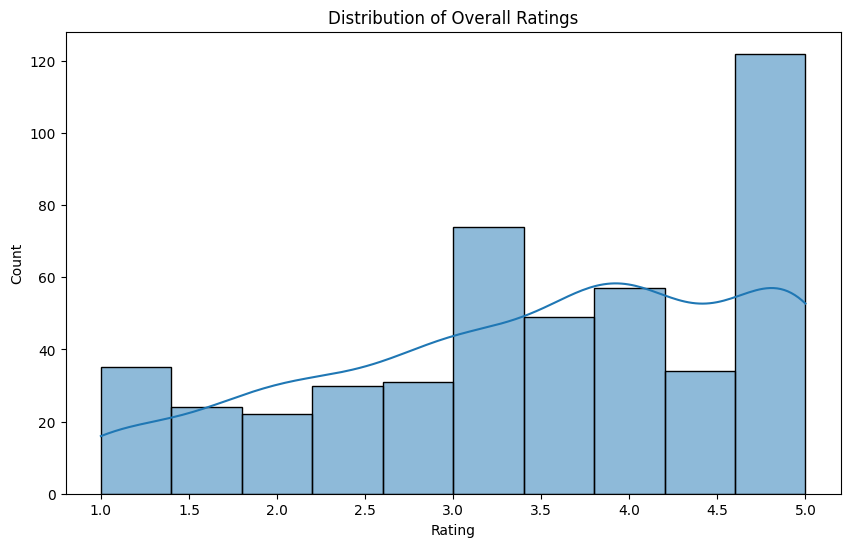

In [86]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Overall Rating'], bins=10, kde=True)
plt.title('Distribution of Overall Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

### Age Range Distribution


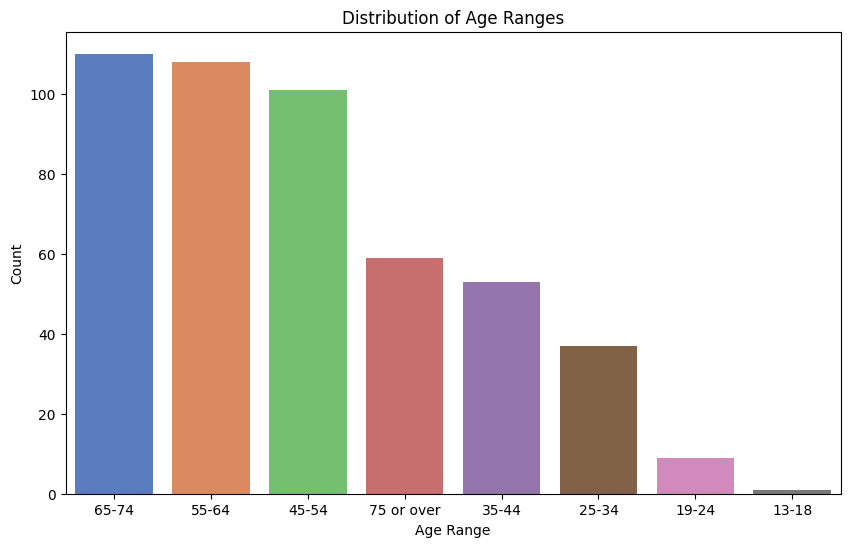

In [87]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Age range', data=df, order=df['Age range'].value_counts().index, palette='muted')
plt.title('Distribution of Age Ranges')
plt.xlabel('Age Range')
plt.ylabel('Count')
plt.show()

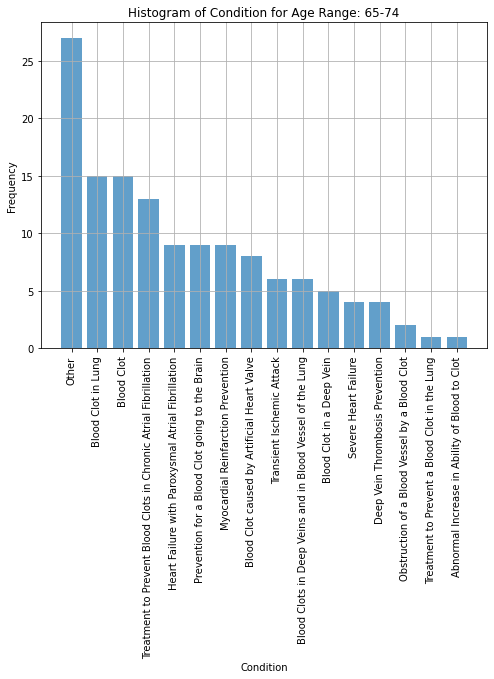

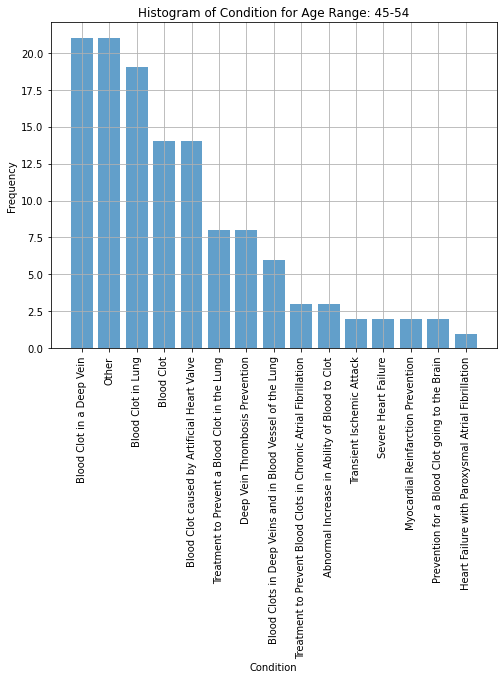

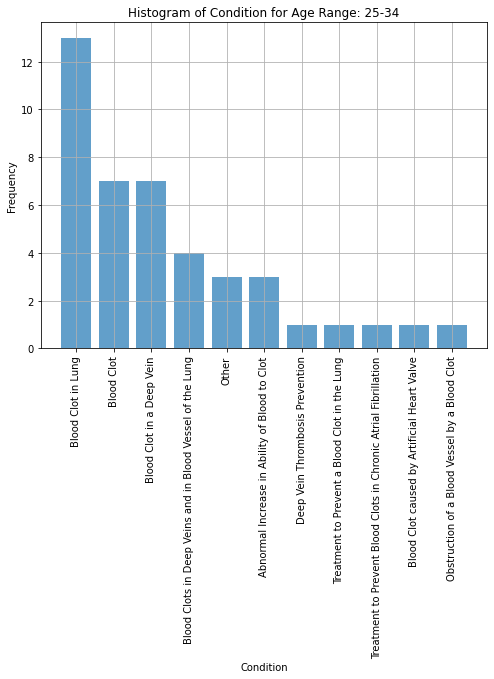

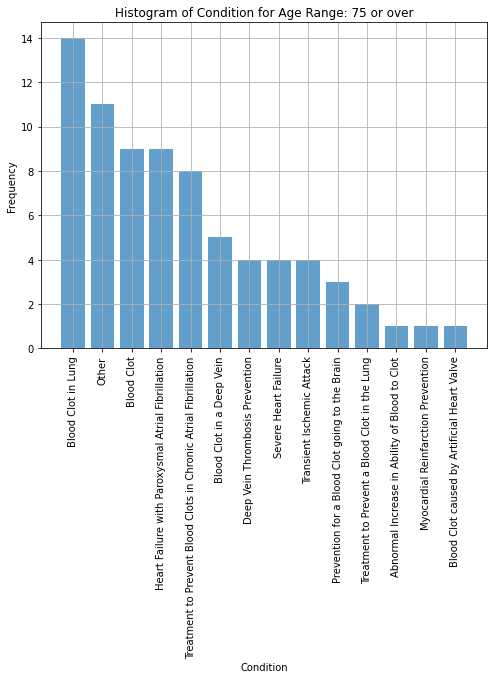

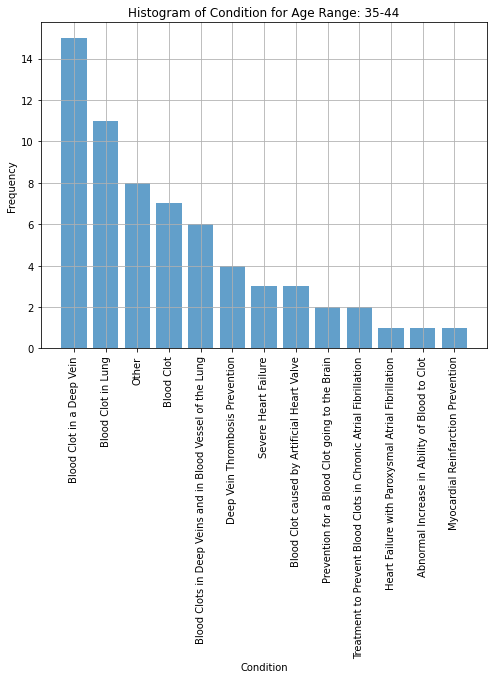

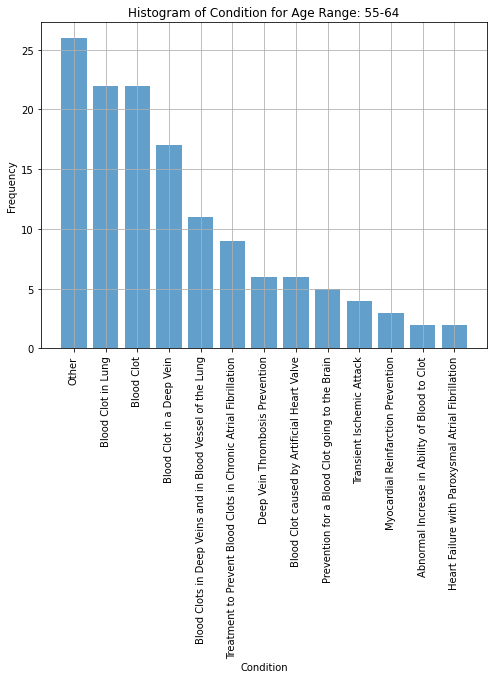

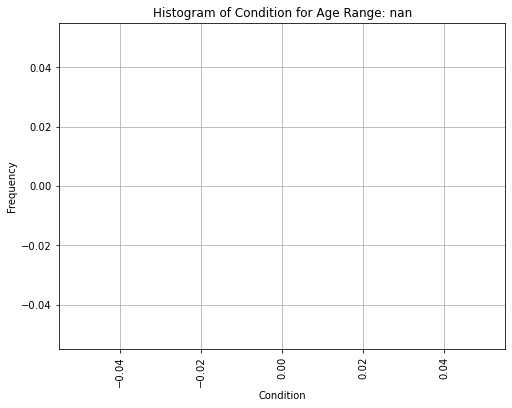

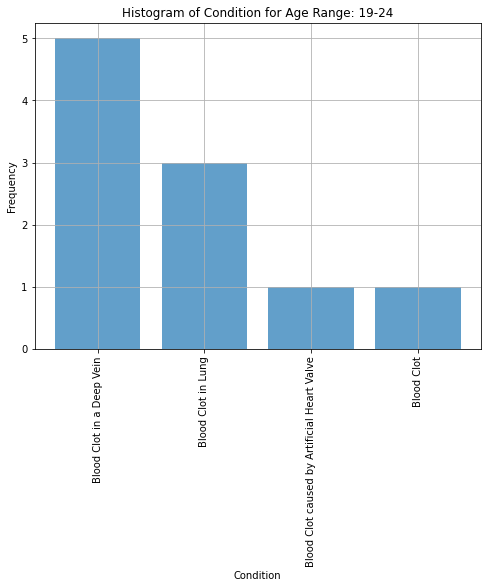

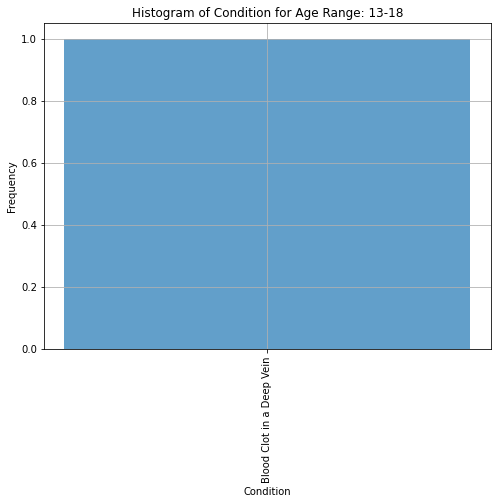

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
url = 'https://raw.githubusercontent.com/USD-502-FinalProject/ADS599-CapstoneProject/main/reviews.xlsx'
data = pd.read_excel(url)

# Plotting histograms for each value in the 'Age range' column against the 'Condition' column
age_ranges = data['Age range'].unique()

for age_range in age_ranges:
    subset_data = data[data['Age range'] == age_range]
    
    # Count occurrences of 'Condition' values and sort by frequency
    condition_counts = subset_data['Condition'].value_counts().sort_values(ascending=False)
    
    plt.figure(figsize=(8, 6))
    plt.bar(condition_counts.index, condition_counts.values, alpha=0.7)
    plt.title(f'Histogram of Condition for Age Range: {age_range}')
    plt.xlabel('Condition')
    plt.ylabel('Frequency')
    plt.xticks(rotation='vertical')  # Rotate x-axis labels vertically
    plt.grid(True)
    plt.show()




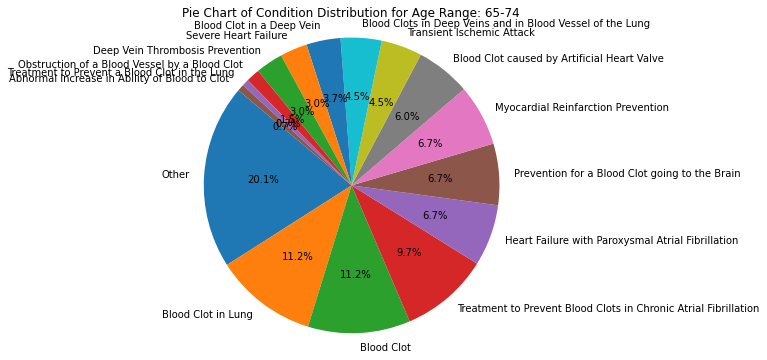

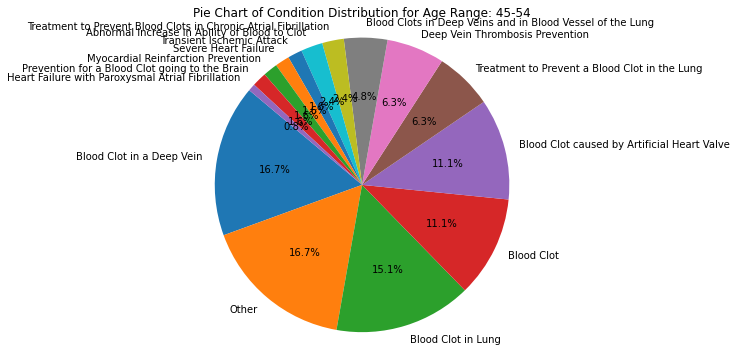

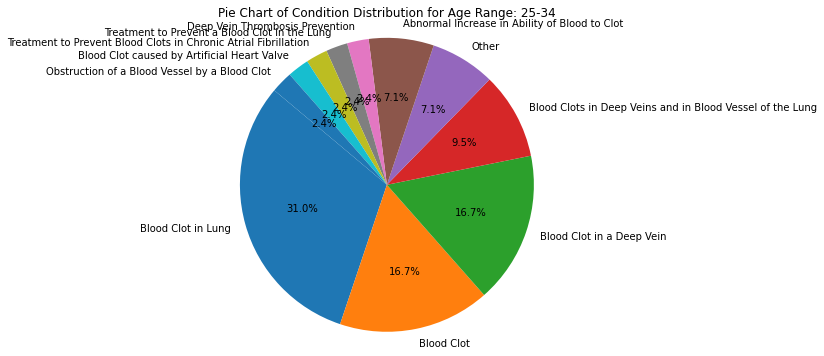

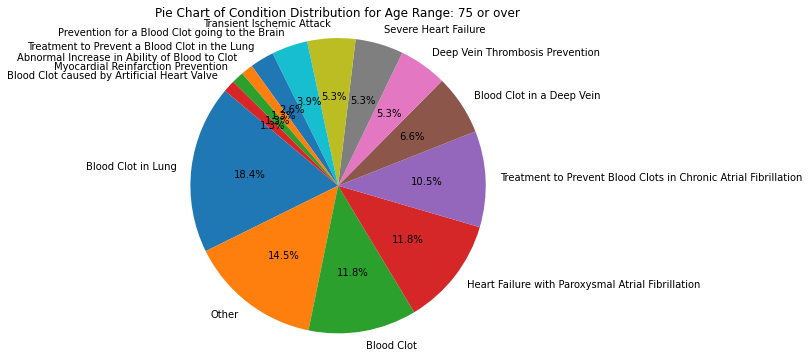

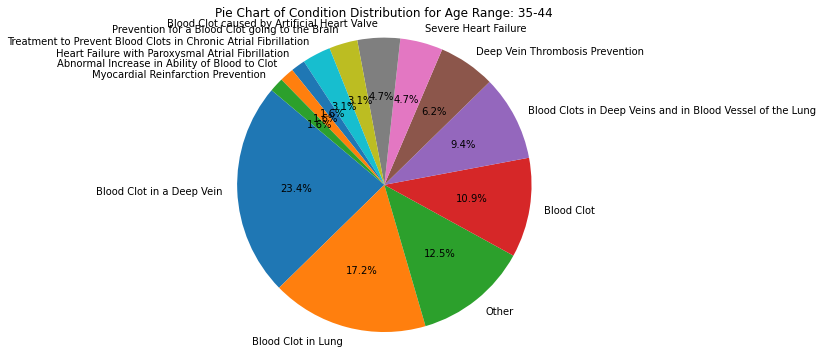

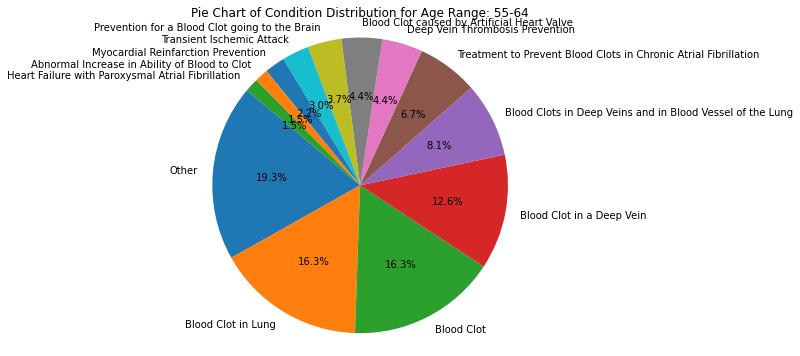

C:\Users\Connie\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 


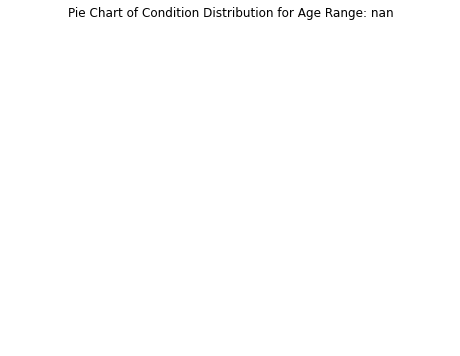

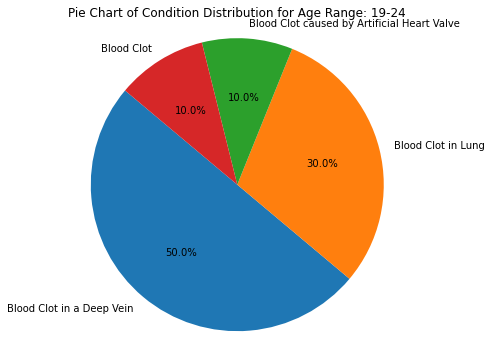

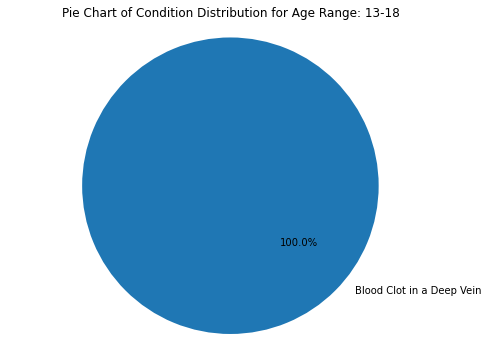

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
url = 'https://raw.githubusercontent.com/USD-502-FinalProject/ADS599-CapstoneProject/main/reviews.xlsx'
data = pd.read_excel(url)

# Plotting pie charts for each value in the 'Age range' column against the 'Condition' column
age_ranges = data['Age range'].unique()

for age_range in age_ranges:
    subset_data = data[data['Age range'] == age_range]
    
    # Count occurrences of 'Condition' values and sort by frequency
    condition_counts = subset_data['Condition'].value_counts().sort_values(ascending=False)
    
    plt.figure(figsize=(8, 6))
    plt.pie(condition_counts.values, labels=condition_counts.index, autopct='%1.1f%%', startangle=140)
    plt.title(f'Pie Chart of Condition Distribution for Age Range: {age_range}')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
    plt.show()


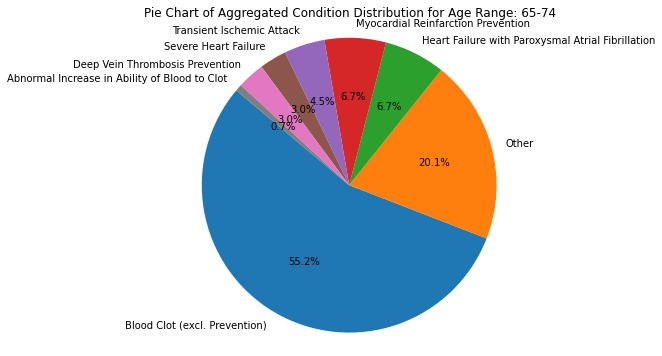

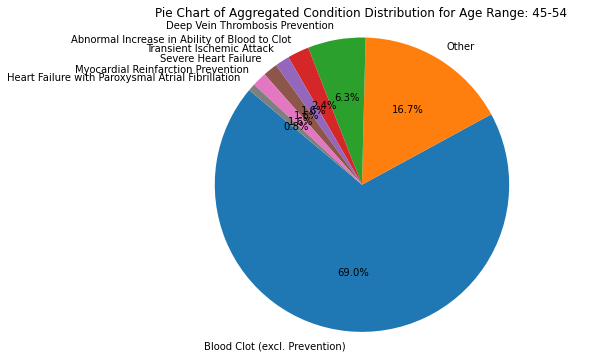

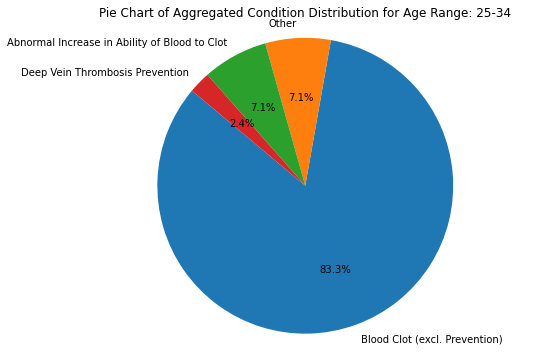

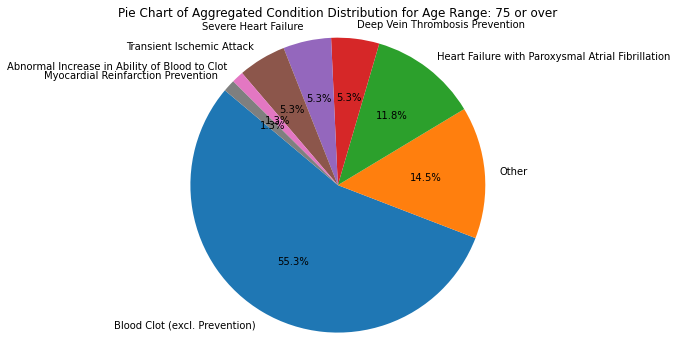

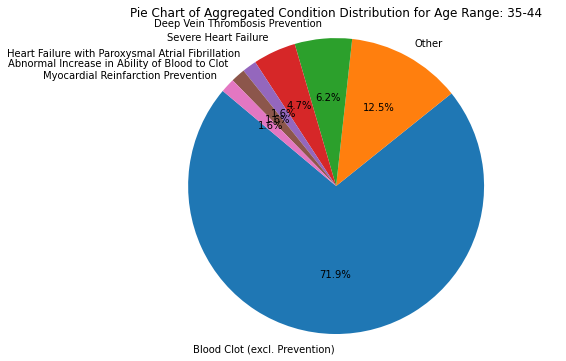

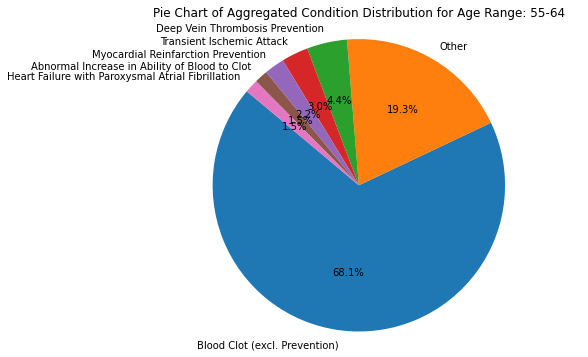

C:\Users\Connie\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 


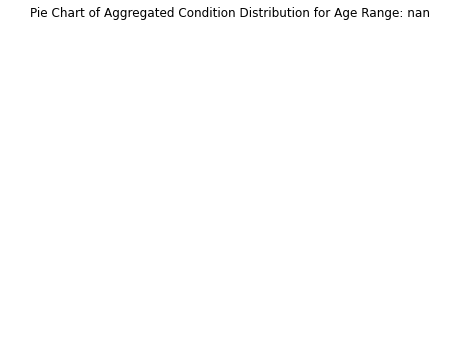

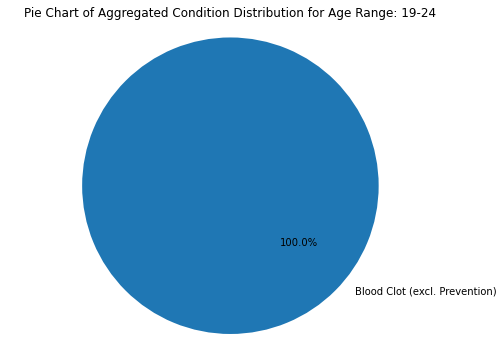

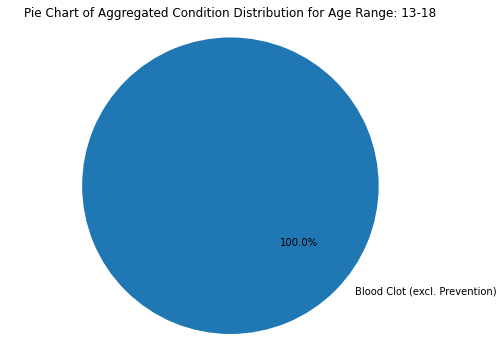

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
url = 'https://raw.githubusercontent.com/USD-502-FinalProject/ADS599-CapstoneProject/main/reviews.xlsx'
data = pd.read_excel(url)

# Filter and aggregate data
def aggregate_conditions(condition):
    if 'Blood Clot' in condition and condition != 'Prevention':
        return 'Blood Clot (excl. Prevention)'
    return condition

data['Aggregated_Condition'] = data['Condition'].apply(aggregate_conditions)

# Plotting pie chart for aggregated conditions for each value in 'Age range'
age_ranges = data['Age range'].unique()

for age_range in age_ranges:
    subset_data = data[data['Age range'] == age_range]
    aggregated_counts = subset_data['Aggregated_Condition'].value_counts()

    plt.figure(figsize=(8, 6))
    plt.pie(aggregated_counts.values, labels=aggregated_counts.index, autopct='%1.1f%%', startangle=140)
    plt.title(f'Pie Chart of Aggregated Condition Distribution for Age Range: {age_range}')
    plt.axis('equal')
    plt.show()


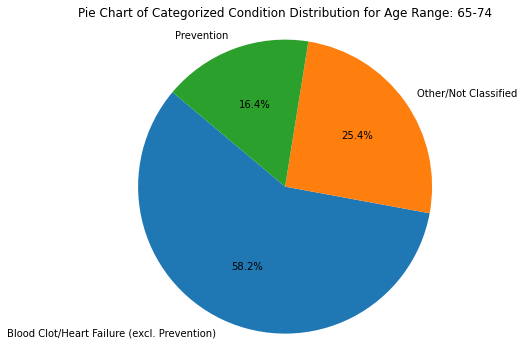

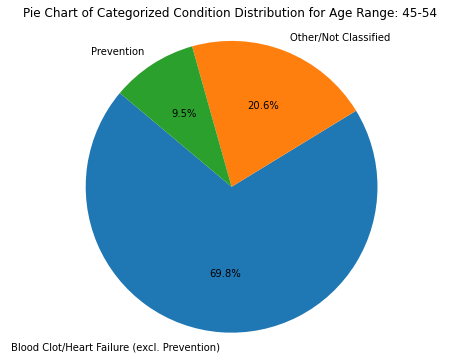

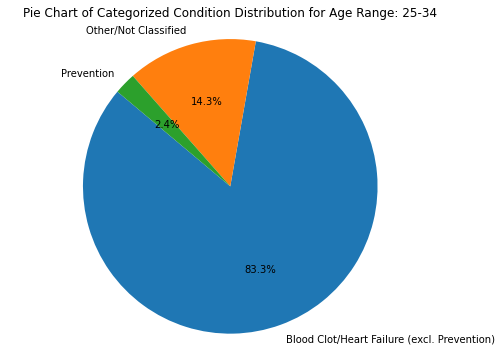

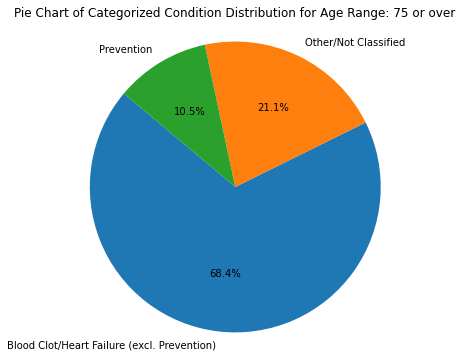

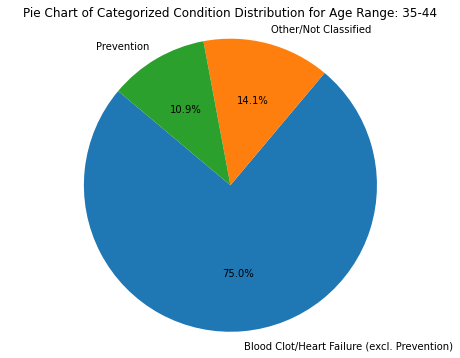

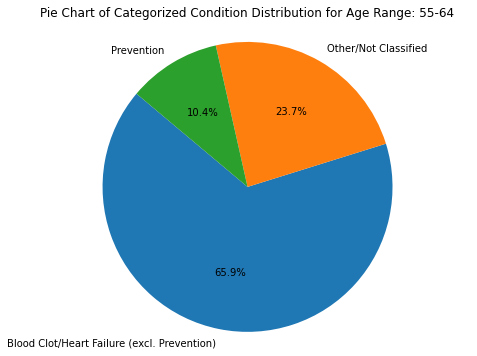

C:\Users\Connie\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 


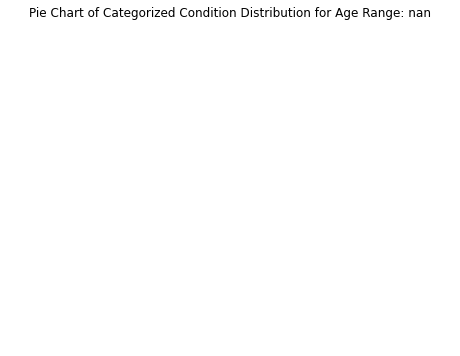

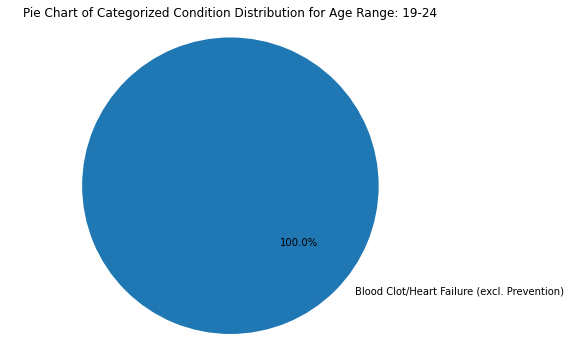

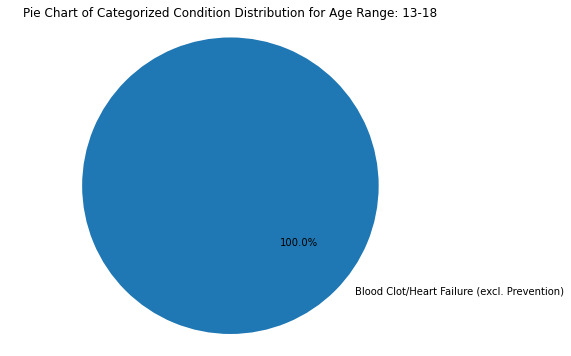

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
url = 'https://raw.githubusercontent.com/USD-502-FinalProject/ADS599-CapstoneProject/main/reviews.xlsx'
data = pd.read_excel(url)

# Categorize values in 'Condition' column
def categorize_condition(condition):
    if 'Blood Clot' in condition or 'Heart Failure' in condition:
        if 'Prevention' not in condition:
            return 'Blood Clot/Heart Failure (excl. Prevention)'
        else:
            return 'Prevention'
    elif 'Prevention' in condition:
        return 'Prevention'
    else:
        return 'Other/Not Classified'

data['Categorized_Condition'] = data['Condition'].apply(categorize_condition)

# Plotting pie chart for categorized conditions for each value in 'Age range'
age_ranges = data['Age range'].unique()

for age_range in age_ranges:
    subset_data = data[data['Age range'] == age_range]
    categorized_counts = subset_data['Categorized_Condition'].value_counts()

    plt.figure(figsize=(8, 6))
    plt.pie(categorized_counts.values, labels=categorized_counts.index, autopct='%1.1f%%', startangle=140)
    plt.title(f'Pie Chart of Categorized Condition Distribution for Age Range: {age_range}')
    plt.axis('equal')
    plt.show()


In [16]:
text_data = data['Review Text']
print(text_data)

0      Headache,gum pain,nausea,muscle pain,hair loss...
1      This is rat poison, this drug shouldn't be con...
2      I’m a 35yr old female that has been on Coumadi...
3      Started taking it last month. Have been dizzy,...
4      Well today I start this drug and I am very sca...
                             ...                        
610    I hate this drug. I've been on it for 2 1/2 mo...
611    I hate this medicine.  It is so difficult to g...
612    The side effects of this medicine is often ove...
613                                                  NaN
614    This is a tough drug to use. You need regular ...
Name: Review Text, Length: 615, dtype: object


In [20]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Connie\AppData\Roaming\nltk_data...


True

In [21]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from gensim import corpora, models

# Load the dataset
url = 'https://raw.githubusercontent.com/USD-502-FinalProject/ADS599-CapstoneProject/main/reviews.xlsx'
data = pd.read_excel(url)

# Function to extract keywords using topic modeling (LDA)
def extract_keywords(text):
    if pd.isnull(text):
        return 'empty'
    else:
        # Tokenize and preprocess the text
        tokens = word_tokenize(text.lower())
        tokens = [token for token in tokens if token.isalpha()]
        tokens = [token for token in tokens if token not in stopwords.words('english')]
        lemmatizer = WordNetLemmatizer()
        tokens = [lemmatizer.lemmatize(token) for token in tokens]

        # Create a dictionary and corpus
        dictionary = corpora.Dictionary([tokens])
        corpus = [dictionary.doc2bow(tokens)]

        # Apply LDA model for topic modeling
        lda_model = models.LdaModel(corpus, num_topics=1, id2word=dictionary)

        # Get top keywords from the topic model
        keywords = lda_model.print_topics(num_words=5)[0][1]
        keywords = keywords.split('"')[1::2]
        return keywords

# Apply the function to create 'side effects' column
data['side effects'] = data['Review Text'].apply(extract_keywords)

# Display the modified dataframe
print(data)


                                           Review Text       Date  \
0    Headache,gum pain,nausea,muscle pain,hair loss...   3/6/2022   
1    This is rat poison, this drug shouldn't be con...   5/2/2021   
2    I’m a 35yr old female that has been on Coumadi...  1/24/2019   
3    Started taking it last month. Have been dizzy,...   8/7/2018   
4    Well today I start this drug and I am very sca...  6/15/2017   
..                                                 ...        ...   
610  I hate this drug. I've been on it for 2 1/2 mo...  10/2/2007   
611  I hate this medicine.  It is so difficult to g...  9/28/2007   
612  The side effects of this medicine is often ove...  9/25/2007   
613                                                NaN  9/21/2007   
614  This is a tough drug to use. You need regular ...  9/19/2007   

         Reviewer Name Age range  Gender  \
0             Warfarin     65-74  Female   
1               FanMan     45-54    Male   
2                  Lee     25-34  Femal

In [23]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from gensim.models.phrases import Phrases, Phraser

# Load the dataset
url = 'https://raw.githubusercontent.com/USD-502-FinalProject/ADS599-CapstoneProject/main/reviews.xlsx'
data = pd.read_excel(url)

# Function to extract phrases using topic modeling
def extract_phrases(text):
    if pd.isnull(text):
        return 'empty'
    else:
        # Tokenize and preprocess the text
        tokens = word_tokenize(text.lower())
        tokens = [token for token in tokens if token.isalpha()]
        tokens = [token for token in tokens if token not in stopwords.words('english')]
        lemmatizer = WordNetLemmatizer()
        tokens = [lemmatizer.lemmatize(token) for token in tokens]

        # Find phrases containing two to three words
        phrases = Phrases([tokens], min_count=1, threshold=1)
        bigram = Phraser(phrases)
        bigram_phrases = bigram[tokens]

        # Extract phrases of length 2 to 3 words
        extracted_phrases = [phrase.replace('_', ' ') for phrase in bigram_phrases if '_' in phrase]
        return extracted_phrases

# Apply the function to create 'side effects phrases' column
data['side effects phrases'] = data['Review Text'].apply(extract_phrases)

# Display the modified dataframe
print(data)


                                           Review Text       Date  \
0    Headache,gum pain,nausea,muscle pain,hair loss...   3/6/2022   
1    This is rat poison, this drug shouldn't be con...   5/2/2021   
2    I’m a 35yr old female that has been on Coumadi...  1/24/2019   
3    Started taking it last month. Have been dizzy,...   8/7/2018   
4    Well today I start this drug and I am very sca...  6/15/2017   
..                                                 ...        ...   
610  I hate this drug. I've been on it for 2 1/2 mo...  10/2/2007   
611  I hate this medicine.  It is so difficult to g...  9/28/2007   
612  The side effects of this medicine is often ove...  9/25/2007   
613                                                NaN  9/21/2007   
614  This is a tough drug to use. You need regular ...  9/19/2007   

         Reviewer Name Age range  Gender  \
0             Warfarin     65-74  Female   
1               FanMan     45-54    Male   
2                  Lee     25-34  Femal

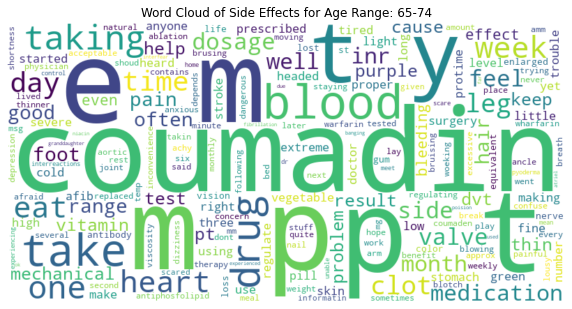

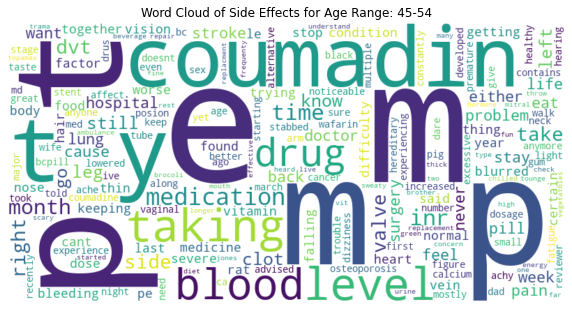

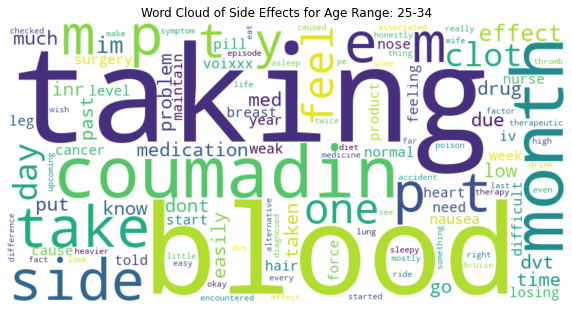

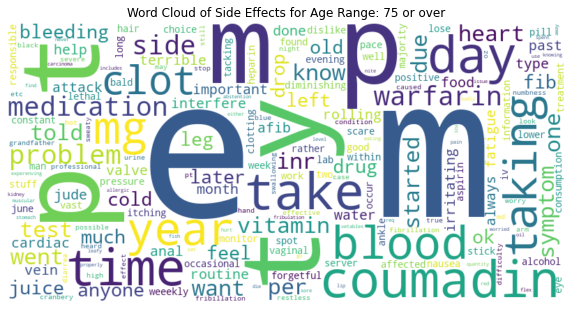

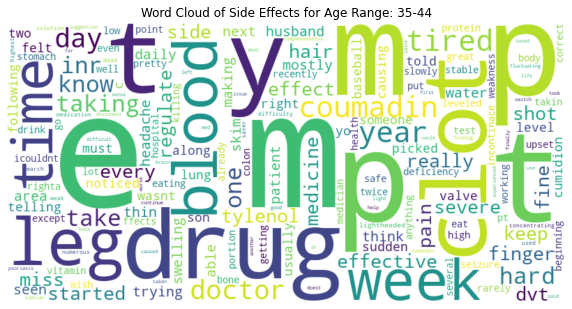

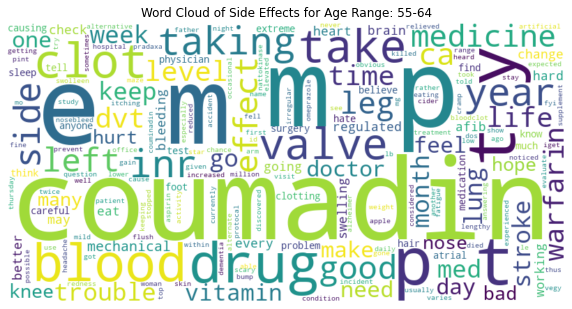

ValueError: We need at least 1 word to plot a word cloud, got 0.

In [22]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from gensim import corpora, models
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Load the dataset
url = 'https://raw.githubusercontent.com/USD-502-FinalProject/ADS599-CapstoneProject/main/reviews.xlsx'
data = pd.read_excel(url)

# Function to extract keywords using topic modeling (LDA)
def extract_keywords(text):
    if pd.isnull(text):
        return 'empty'
    else:
        # Tokenize and preprocess the text
        tokens = word_tokenize(text.lower())
        tokens = [token for token in tokens if token.isalpha()]
        tokens = [token for token in tokens if token not in stopwords.words('english')]
        lemmatizer = WordNetLemmatizer()
        tokens = [lemmatizer.lemmatize(token) for token in tokens]

        # Create a dictionary and corpus
        dictionary = corpora.Dictionary([tokens])
        corpus = [dictionary.doc2bow(tokens)]

        # Apply LDA model for topic modeling
        lda_model = models.LdaModel(corpus, num_topics=1, id2word=dictionary)

        # Get top keywords from the topic model
        keywords = lda_model.print_topics(num_words=5)[0][1]
        keywords = keywords.split('"')[1::2]
        return keywords

# Apply the function to create 'side effects' column
data['side effects'] = data['Review Text'].apply(extract_keywords)

# Generate word cloud per 'Age range'
age_ranges = data['Age range'].unique()

for age_range in age_ranges:
    subset_data = data[data['Age range'] == age_range]
    text = ' '.join([str(item) for sublist in subset_data['side effects'] for item in sublist])
    
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud of Side Effects for Age Range: {age_range}')
    plt.axis('off')
    plt.show()


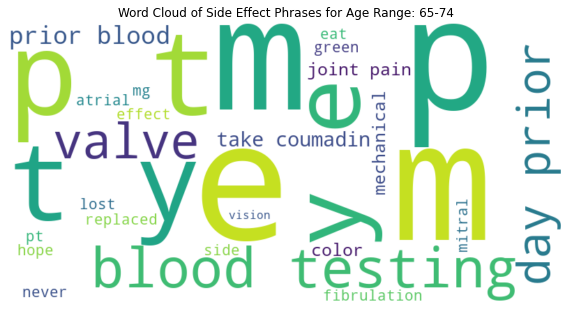

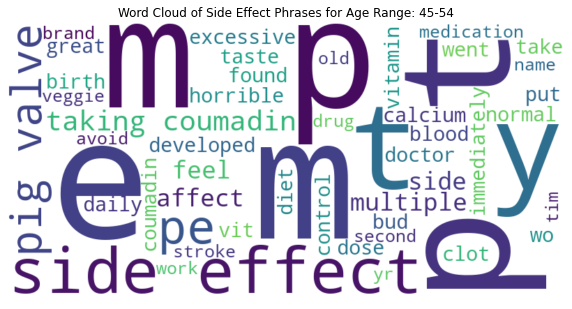

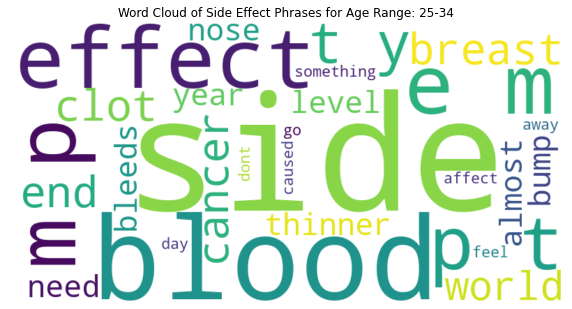

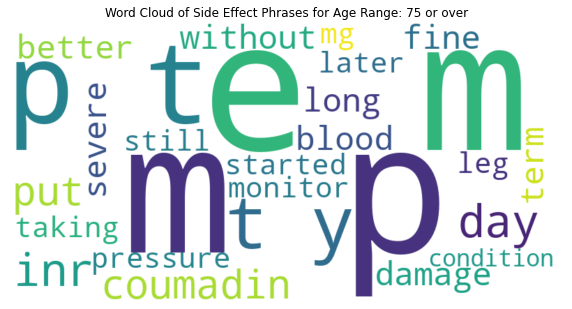

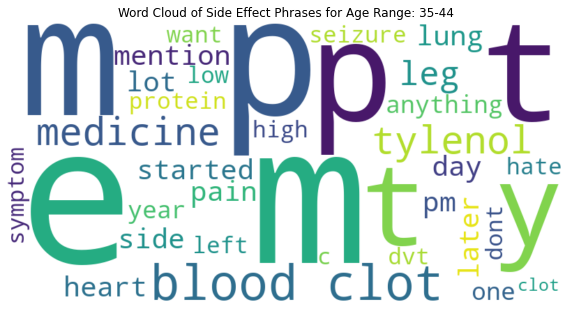

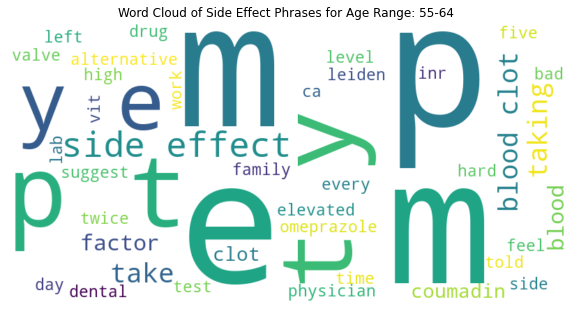

ValueError: We need at least 1 word to plot a word cloud, got 0.

In [24]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from gensim.models.phrases import Phrases, Phraser
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Load the dataset
url = 'https://raw.githubusercontent.com/USD-502-FinalProject/ADS599-CapstoneProject/main/reviews.xlsx'
data = pd.read_excel(url)

# Function to extract phrases using topic modeling
def extract_phrases(text):
    if pd.isnull(text):
        return 'empty'
    else:
        # Tokenize and preprocess the text
        tokens = word_tokenize(text.lower())
        tokens = [token for token in tokens if token.isalpha()]
        tokens = [token for token in tokens if token not in stopwords.words('english')]
        lemmatizer = WordNetLemmatizer()
        tokens = [lemmatizer.lemmatize(token) for token in tokens]

        # Find phrases containing two to three words
        phrases = Phrases([tokens], min_count=1, threshold=1)
        bigram = Phraser(phrases)
        bigram_phrases = bigram[tokens]

        # Extract phrases of length 2 to 3 words
        extracted_phrases = [phrase.replace('_', ' ') for phrase in bigram_phrases if '_' in phrase]
        return extracted_phrases

# Apply the function to create 'side effects phrases' column
data['side effects phrases'] = data['Review Text'].apply(extract_phrases)

# Generate word cloud per 'Age range'
age_ranges = data['Age range'].unique()

for age_range in age_ranges:
    subset_data = data[data['Age range'] == age_range]
    text = ' '.join([phrase for sublist in subset_data['side effects phrases'] for phrase in sublist])
    
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud of Side Effect Phrases for Age Range: {age_range}')
    plt.axis('off')
    plt.show()


In [31]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from gensim.models.phrases import Phrases, Phraser

# Load the dataset
url = 'https://raw.githubusercontent.com/USD-502-FinalProject/ADS599-CapstoneProject/main/reviews.xlsx'
data = pd.read_excel(url)

# Function to extract phrases using topic modeling
def extract_phrases(text):
    if pd.isnull(text):
        return 'empty'
    else:
        # Tokenize and preprocess the text
        tokens = word_tokenize(text.lower())
        tokens = [token for token in tokens if token.isalpha()]
        tokens = [token for token in tokens if token not in stopwords.words('english')]
        lemmatizer = WordNetLemmatizer()
        tokens = [lemmatizer.lemmatize(token) for token in tokens]

        # Find phrases containing two to three words
        phrases = Phrases([tokens], min_count=1, threshold=1)
        bigram = Phraser(phrases)
        bigram_phrases = bigram[tokens]

        # Extract phrases of length 2 to 3 words
        extracted_phrases = [phrase.replace('_', ' ') for phrase in bigram_phrases if '_' in phrase]
        return extracted_phrases

# Apply the function to create 'side effects phrases' column
data['side effects phrases'] = data['Review Text'].apply(extract_phrases)

# Display top 10 most common phrases per 'Age range'
age_ranges = data['Age range'].unique()

for age_range in age_ranges:
    subset_data = data[data['Age range'] == age_range]
    phrases_list = [phrase for sublist in subset_data['side effects phrases'] for phrase in sublist]
    phrase_counts = pd.Series(phrases_list).value_counts().head(18)
    
    print(f"Top 10 phrases for Age Range: {age_range}")
    print(phrase_counts)
    print("=" * 30)


Top 10 phrases for Age Range: 65-74
e                     19
y                     19
m                     19
p                     19
t                     19
blood testing          9
day prior              6
take coumadin          4
joint pain             3
mechanical valve       3
mg pt                  2
eat green              2
hope never             2
lost color             2
mitral valve           2
valve replaced         2
side effect            2
atrial fibrulation     2
dtype: int64
Top 10 phrases for Age Range: 45-54
e                  20
m                  20
p                  20
t                  20
y                  20
side effect        10
taking coumadin     4
pig valve           4
feel like           3
side affect         3
multiple pe         3
pe found            2
blood clot          2
take daily          2
yr old              2
veggie avoid        2
medication tim      2
went coumadin       2
dtype: int64
Top 10 phrases for Age Range: 25-34
e                 4


C:\Users\Connie\Anaconda3\lib\site-packages\ipykernel_launcher.py:41: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.


<AxesSubplot:title={'center':'Bigrams Frequency - Most Common Two Word Phrases in Drug Reviews - Ages 65-74'}, xlabel='Bigram Words', ylabel='Count'>

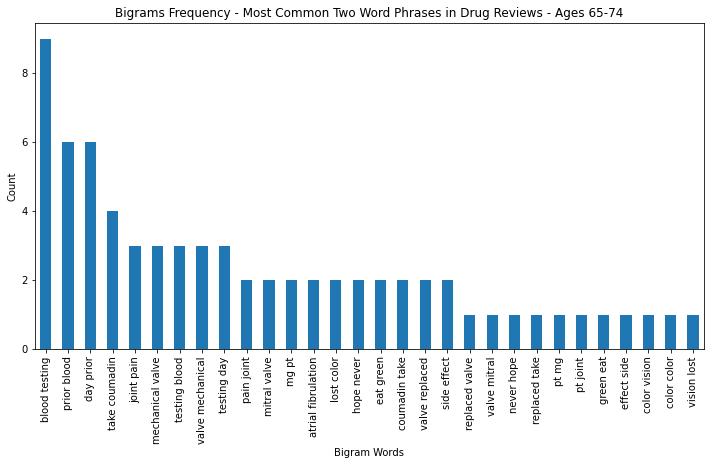

In [36]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2,2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

# Get preprocessed tokens as string
df_good_reviews = data.copy()
df_good_reviews = df_good_reviews[df_good_reviews['Age range'] == '65-74']
df_good_reviews['combined_tokens'] = df_good_reviews['side effects phrases'].apply(lambda token_list: ' '.join(token_list))
common_words = get_top_n_bigram(df_good_reviews['combined_tokens'], 30)
df2 = pd.DataFrame(common_words, columns=['Text', "Count"])

df2.groupby('Text').sum()['Count'].sort_values(ascending=False).plot(
kind='bar',
figsize=(12,6),
xlabel = "Bigram Words",
ylabel = "Count",
title = "Bigrams Frequency - Most Common Two Word Phrases in Drug Reviews - Ages 65-74"
)

<AxesSubplot:title={'center':'Bigrams Frequency - Most Common Two Word Phrases in Drug Reviews - Ages 45-54'}, xlabel='Bigram Words', ylabel='Count'>

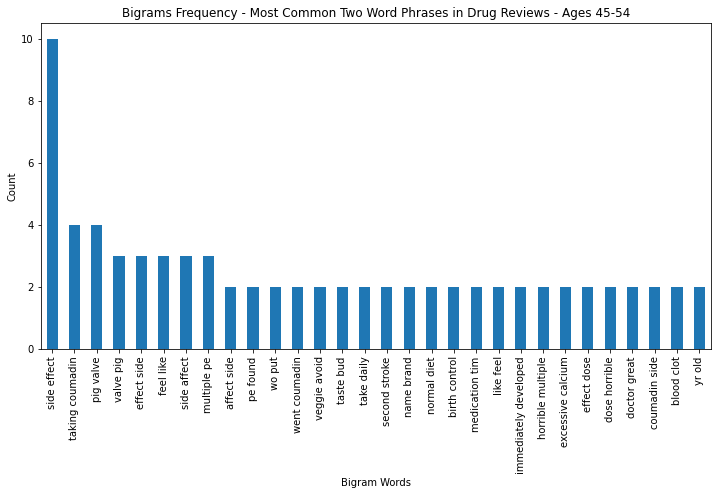

In [38]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2,2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

# Get preprocessed tokens as string
df_good_reviews = data.copy()
df_good_reviews = df_good_reviews[df_good_reviews['Age range'] == '45-54']
df_good_reviews['combined_tokens'] = df_good_reviews['side effects phrases'].apply(lambda token_list: ' '.join(token_list))
common_words = get_top_n_bigram(df_good_reviews['combined_tokens'], 30)
df2 = pd.DataFrame(common_words, columns=['Text', "Count"])

df2.groupby('Text').sum()['Count'].sort_values(ascending=False).plot(
kind='bar',
figsize=(12,6),
xlabel = "Bigram Words",
ylabel = "Count",
title = "Bigrams Frequency - Most Common Two Word Phrases in Drug Reviews - Ages 45-54"
)

<AxesSubplot:title={'center':'Bigrams Frequency - Most Common Two Word Phrases in Drug Reviews - Ages 35-44'}, xlabel='Bigram Words', ylabel='Count'>

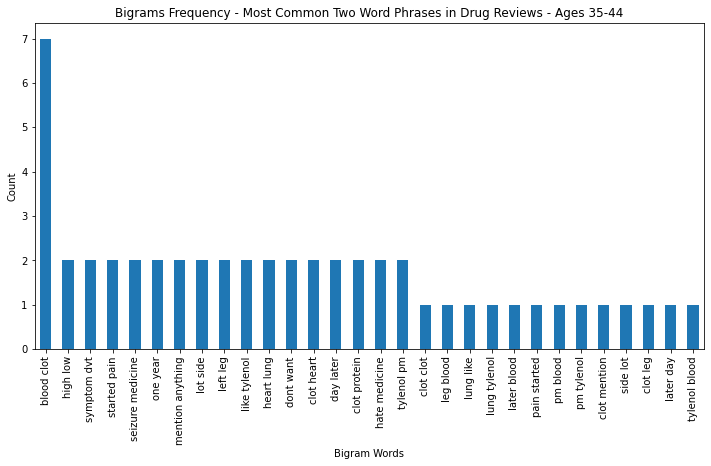

In [39]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2,2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

# Get preprocessed tokens as string
df_good_reviews = data.copy()
df_good_reviews = df_good_reviews[df_good_reviews['Age range'] == '35-44']
df_good_reviews['combined_tokens'] = df_good_reviews['side effects phrases'].apply(lambda token_list: ' '.join(token_list))
common_words = get_top_n_bigram(df_good_reviews['combined_tokens'], 30)
df2 = pd.DataFrame(common_words, columns=['Text', "Count"])

df2.groupby('Text').sum()['Count'].sort_values(ascending=False).plot(
kind='bar',
figsize=(12,6),
xlabel = "Bigram Words",
ylabel = "Count",
title = "Bigrams Frequency - Most Common Two Word Phrases in Drug Reviews - Ages 35-44"
)

<AxesSubplot:title={'center':'Bigrams Frequency - Most Common Two Word Phrases in Drug Reviews - Ages 75 or over'}, xlabel='Bigram Words', ylabel='Count'>

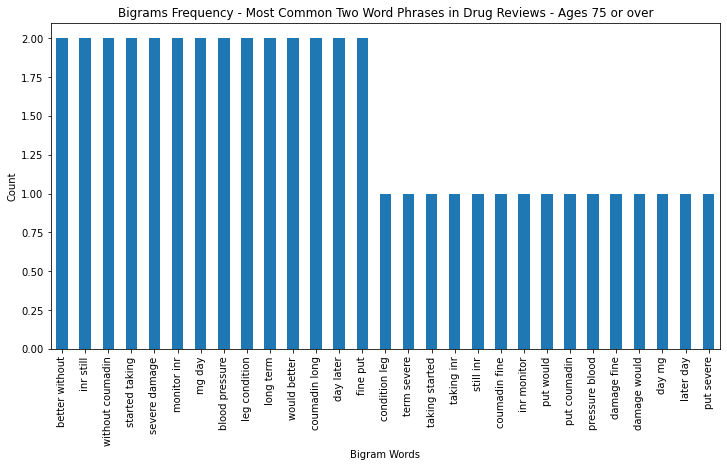

In [40]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2,2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

# Get preprocessed tokens as string
df_good_reviews = data.copy()
df_good_reviews = df_good_reviews[df_good_reviews['Age range'] == '75 or over']
df_good_reviews['combined_tokens'] = df_good_reviews['side effects phrases'].apply(lambda token_list: ' '.join(token_list))
common_words = get_top_n_bigram(df_good_reviews['combined_tokens'], 30)
df2 = pd.DataFrame(common_words, columns=['Text', "Count"])

df2.groupby('Text').sum()['Count'].sort_values(ascending=False).plot(
kind='bar',
figsize=(12,6),
xlabel = "Bigram Words",
ylabel = "Count",
title = "Bigrams Frequency - Most Common Two Word Phrases in Drug Reviews - Ages 75 or over"
)

<AxesSubplot:title={'center':'Bigrams Frequency - Most Common Two Word Phrases in Drug Reviews - Ages 25-34'}, xlabel='Bigram Words', ylabel='Count'>

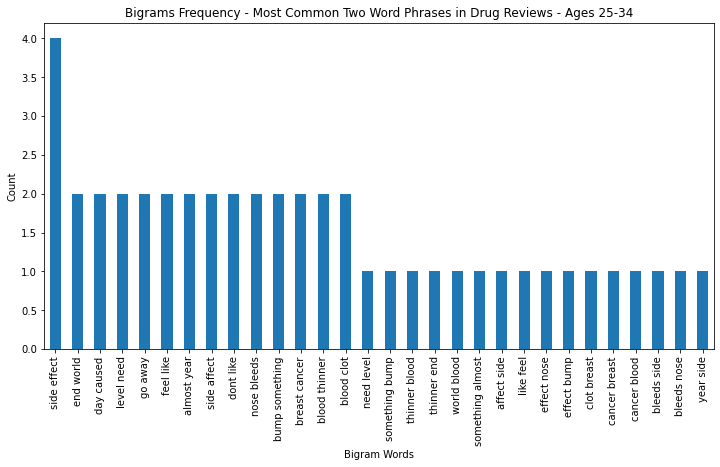

In [41]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2,2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

# Get preprocessed tokens as string
df_good_reviews = data.copy()
df_good_reviews = df_good_reviews[df_good_reviews['Age range'] == '25-34']
df_good_reviews['combined_tokens'] = df_good_reviews['side effects phrases'].apply(lambda token_list: ' '.join(token_list))
common_words = get_top_n_bigram(df_good_reviews['combined_tokens'], 30)
df2 = pd.DataFrame(common_words, columns=['Text', "Count"])

df2.groupby('Text').sum()['Count'].sort_values(ascending=False).plot(
kind='bar',
figsize=(12,6),
xlabel = "Bigram Words",
ylabel = "Count",
title = "Bigrams Frequency - Most Common Two Word Phrases in Drug Reviews - Ages 25-34"
)

<AxesSubplot:title={'center':'Bigrams Frequency - Most Common Two Word Phrases in Drug Reviews - Ages 19-24'}, xlabel='Bigram Words', ylabel='Count'>

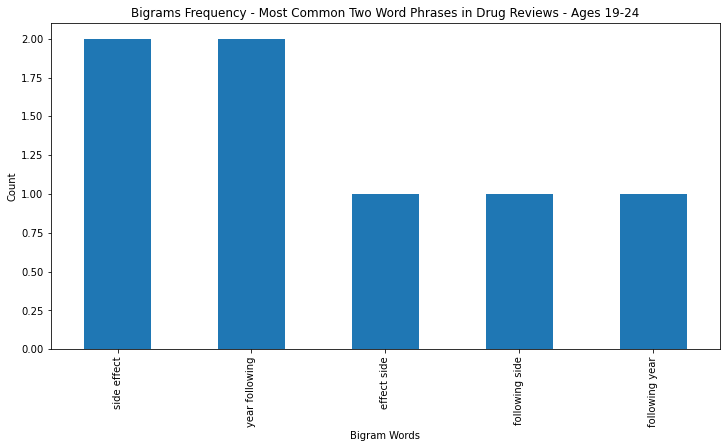

In [42]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2,2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

# Get preprocessed tokens as string
df_good_reviews = data.copy()
df_good_reviews = df_good_reviews[df_good_reviews['Age range'] == '19-24']
df_good_reviews['combined_tokens'] = df_good_reviews['side effects phrases'].apply(lambda token_list: ' '.join(token_list))
common_words = get_top_n_bigram(df_good_reviews['combined_tokens'], 30)
df2 = pd.DataFrame(common_words, columns=['Text', "Count"])

df2.groupby('Text').sum()['Count'].sort_values(ascending=False).plot(
kind='bar',
figsize=(12,6),
xlabel = "Bigram Words",
ylabel = "Count",
title = "Bigrams Frequency - Most Common Two Word Phrases in Drug Reviews - Ages 19-24"
)

In [43]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2,2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

# Get preprocessed tokens as string
df_good_reviews = data.copy()
df_good_reviews = df_good_reviews[df_good_reviews['Age range'] == '13-18']
df_good_reviews['combined_tokens'] = df_good_reviews['side effects phrases'].apply(lambda token_list: ' '.join(token_list))
common_words = get_top_n_bigram(df_good_reviews['combined_tokens'], 30)
df2 = pd.DataFrame(common_words, columns=['Text', "Count"])

df2.groupby('Text').sum()['Count'].sort_values(ascending=False).plot(
kind='bar',
figsize=(12,6),
xlabel = "Bigram Words",
ylabel = "Count",
title = "Bigrams Frequency - Most Common Two Word Phrases in Drug Reviews - Ages 13-18"
)

ValueError: empty vocabulary; perhaps the documents only contain stop words

In [46]:
df_good_reviews = data.copy()
df_good_reviews = df_good_reviews[df_good_reviews['Age range'] == '65-74']
print(df_good_reviews['side effects phrases'])

0                                            []
7        [lost color, color vision, lost color]
8                                            []
9                                            []
12                                           []
                         ...                   
584                                          []
587                                          []
593                                          []
596                                          []
598    [atrial fibrulation, atrial fibrulation]
Name: side effects phrases, Length: 134, dtype: object


In [50]:
import pandas as pd
import re

# Load the dataset
url = 'https://raw.githubusercontent.com/USD-502-FinalProject/ADS599-CapstoneProject/main/reviews.xlsx'
data = pd.read_excel(url)

# Define the list of symptoms to capture
symptoms = ['weight', 'lost weight', 'dizzy', 'dizzy spells', 'nose bleeds', 'blurry', 'blurry vision', 'joint/muscle pain', 'headaches', 'joint pain', 'joint', 'pain', 'headaches', 'bruise', 'bruises', 'bruising', 'rash', 'nauseousness', 'swelling', 'went away', 'fatigue', 'upset stomach', 'stomach', 'heartburn', 'ulcer', 'severe side effects', 'birth control', 'sick', 'shaky', 'seizures', 'seizure', 'migraine', 'migraines', 'lightheadedness', 'light headed', 'light headedness', 'shortness of breath', 'weight gain', 'gained weight', 'hair', 'teeth', 'memory', 'liver', 'hated', 'losing my hair', 'thyroid', 'extreme tireness', 'tired', 'tiredness', 'cold', 'flu', 'bleeding', 'brain', 'gained', 'lbs', 'diarrhea', 'chill', 'appetite', 'loss of appetite', 'bleeding gums', 'heavy', 'heavy periods', 'periods', 'chills', 'tremors', 'tremours', 'muscle', 'anxious', 'anxioius', 'sleep', 'naseous', 'tired all the time', 'off this drug', 'nausea', 'vomiting', 'vomit', 'constipation', 'vision', 'vision loss', 'hair thinning', 'thinning hair', 'dizziness']

# Function to extract side effects related to symptoms
def extract_side_effects(text):
    if pd.isnull(text):
        return []
    else:
        text = text.lower()  # Convert text to lowercase for case-insensitive search
        side_effects_list = []
        matches = re.findall(r"(?i)(?:side effect(?:s)?)(?:.*?)(\b(?:{})\b)".format('|'.join(symptoms)), text)
        
        if matches:
            side_effects_list.extend(matches)
        
        return side_effects_list

# Create 'side effects listed' column based on 'Review Text'
data['side effects listed'] = data['Review Text'].apply(extract_side_effects)

# Display the updated DataFrame with the new column
print(data[['Review Text', 'side effects listed']])


                                           Review Text side effects listed
0    Headache,gum pain,nausea,muscle pain,hair loss...                  []
1    This is rat poison, this drug shouldn't be con...                  []
2    I’m a 35yr old female that has been on Coumadi...                  []
3    Started taking it last month. Have been dizzy,...                  []
4    Well today I start this drug and I am very sca...                  []
..                                                 ...                 ...
610  I hate this drug. I've been on it for 2 1/2 mo...                  []
611  I hate this medicine.  It is so difficult to g...                  []
612  The side effects of this medicine is often ove...              [hair]
613                                                NaN                  []
614  This is a tough drug to use. You need regular ...          [bleeding]

[615 rows x 2 columns]


In [61]:
print(age_ranges)

{'75 and older': [], '65-74': ['pain', 'hair', 'muscle', 'sleep', 'nausea', 'vision', 'bleeding', 'fatigue', 'hair', 'memory', 'fatigue', 'hair', 'anxious', 'cold', 'dizzy', 'bleeding', 'dizzy', 'stomach', 'dizzy', 'stomach', 'diarrhea', 'light headed', 'joint', 'pain', 'tired', 'muscle', 'tired', 'dizziness', 'light headed', 'shortness of breath', 'light headed', 'tired', 'dizziness', 'dizziness', 'swelling', 'shortness of breath', 'cold', 'sleep', 'weight', 'joint pain', 'joint', 'pain', 'bruising', 'nose bleeds', 'tired', 'bleeding', 'bruising', 'tired', 'tiredness', 'muscle', 'sleep', 'pain', 'swelling', 'stomach', 'bleeding', 'brain', 'joint', 'hair', 'losing my hair', 'dizzy', 'headaches', 'joint', 'pain', 'headaches', 'hair', 'tired', 'gained', 'lbs', 'tired all the time', 'joint', 'pain', 'hair', 'hair', 'fatigue', 'muscle', 'brain', 'heavy', 'swelling', 'stomach', 'tired', 'tiredness', 'gained', 'diarrhea', 'tired', 'naseous', 'tired all the time', 'bleeding', 'vision', 'cold'

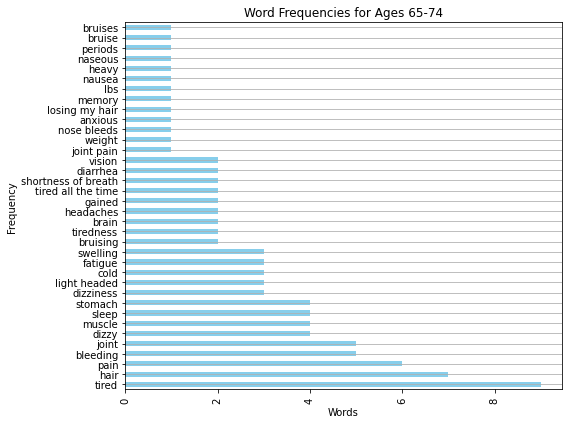

In [74]:
# Create a pandas Series from the word list and plot the histogram
word_series = pd.Series(age_ranges['65-74'])
plt.figure(figsize=(8, 6))
word_series.value_counts().plot(kind='barh', color='skyblue')
plt.title('Word Frequencies for Ages 65-74')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation='vertical')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

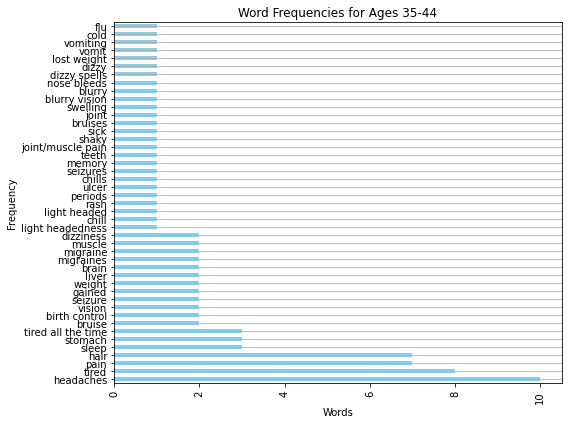

In [78]:
# Create a pandas Series from the word list and plot the histogram
word_series = pd.Series(age_ranges['35-44'])
plt.figure(figsize=(8, 6))
word_series.value_counts().plot(kind='barh', color='skyblue')
plt.title('Word Frequencies for Ages 35-44')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation='vertical')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

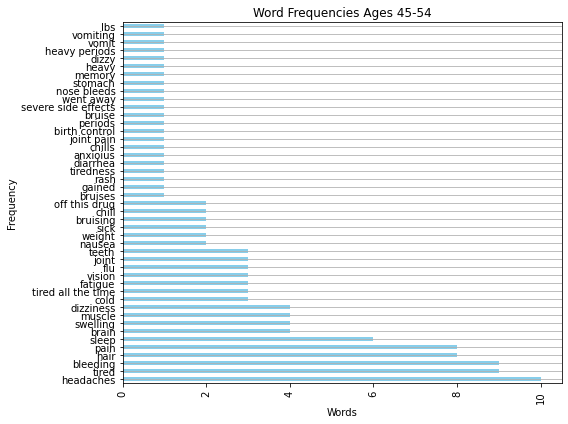

In [75]:
# Create a pandas Series from the word list and plot the histogram
word_series = pd.Series(age_ranges['45-54'])
plt.figure(figsize=(8, 6))
word_series.value_counts().plot(kind='barh', color='skyblue')
plt.title('Word Frequencies Ages 45-54')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation='vertical')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

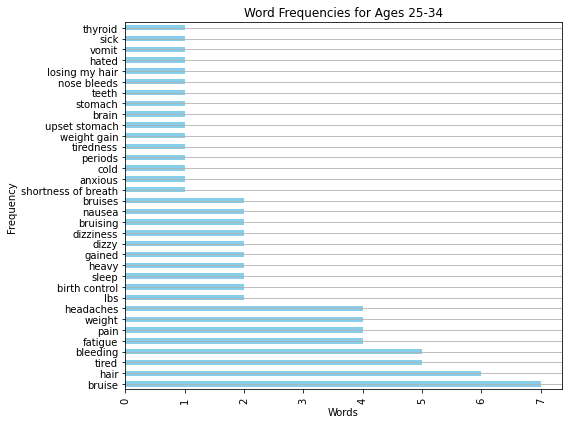

In [76]:
# Create a pandas Series from the word list and plot the histogram
word_series = pd.Series(age_ranges['25-34'])
plt.figure(figsize=(8, 6))
word_series.value_counts().plot(kind='barh', color='skyblue')
plt.title('Word Frequencies for Ages 25-34')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation='vertical')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

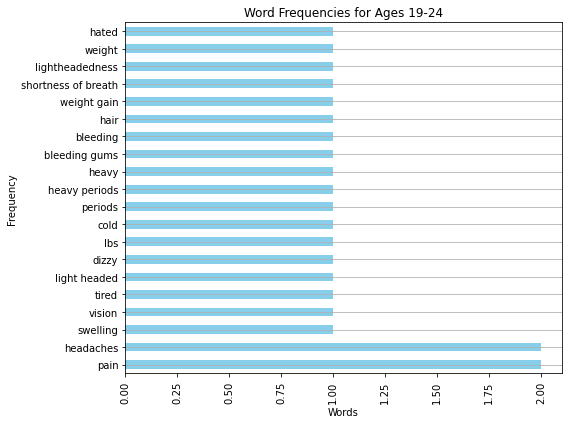

In [77]:
# Create a pandas Series from the word list and plot the histogram
word_series = pd.Series(age_ranges['19-24'])
plt.figure(figsize=(8, 6))
word_series.value_counts().plot(kind='barh', color='skyblue')
plt.title('Word Frequencies for Ages 19-24')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation='vertical')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [71]:
# Create a pandas Series from the word list and plot the histogram
word_series = pd.Series(age_ranges['75 or over'])
plt.figure(figsize=(8, 6))
word_series.value_counts().plot(kind='bar', color='skyblue')
plt.title('Word Frequencies')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation='vertical')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

KeyError: '75 or over'

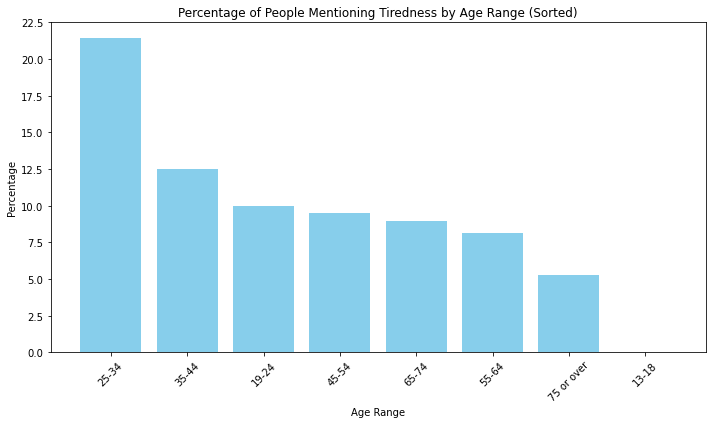

In [114]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
url = 'https://raw.githubusercontent.com/USD-502-FinalProject/ADS599-CapstoneProject/main/reviews.xlsx'
data = pd.read_excel(url)
# Assuming 'data' is your DataFrame
data.dropna(subset=['Age range'], inplace=True)


# Function to check for 'tired', 'tiredness', or 'fatigue' in 'Review Text'
def check_tiredness(text):
    if pd.isnull(text):
        return False
    else:
        text = text.lower()
        return ('tired' in text) or ('tiredness' in text) or ('fatigue' in text)

# Mark rows where 'tired', 'tiredness', or 'fatigue' is mentioned
data['Tiredness Mentioned'] = data['Review Text'].apply(check_tiredness)

# Group by 'Age range' and calculate the percentage of people mentioning 'tiredness'
age_ranges = data['Age range'].unique()

percentage_list = []

for age_range in age_ranges:
    if pd.isnull(age_range):
        continue  # Skip NaN or null values in 'Age range'
    
    subset = data[data['Age range'] == age_range]
    total_count = len(subset)
    tired_count = len(subset[subset['Tiredness Mentioned'] == True])
    
    if total_count != 0:
        percentage = (tired_count / total_count) * 100
        percentage_list.append(percentage)
    else:
        percentage_list.append(np.nan)


# Sort percentage_list and age_ranges based on percentage_list values
sorted_indices = np.argsort(percentage_list)[::-1]  # Get indices for sorting in descending order
sorted_percentage = [percentage_list[i] for i in sorted_indices]
sorted_age_ranges = [age_ranges[i] for i in sorted_indices]

# Plotting the sorted chart
plt.figure(figsize=(10, 6))
plt.bar(sorted_age_ranges, sorted_percentage, color='skyblue')
plt.title('Percentage of People Mentioning Tiredness by Age Range (Sorted)')
plt.xlabel('Age Range')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

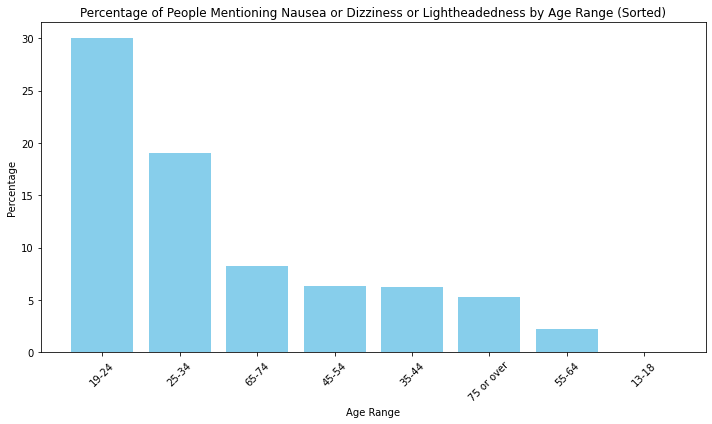

In [113]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
url = 'https://raw.githubusercontent.com/USD-502-FinalProject/ADS599-CapstoneProject/main/reviews.xlsx'
data = pd.read_excel(url)
# Assuming 'data' is your DataFrame
data.dropna(subset=['Age range'], inplace=True)


# Function to check for 'tired', 'tiredness', or 'fatigue' in 'Review Text'
def check_tiredness(text):
    if pd.isnull(text):
        return False
    else:
        text = text.lower()
        return ('nausea' in text) or ('dizz' in text) or ('nau' in text) or ('light' in text)

# Mark rows where 'tired', 'tiredness', or 'fatigue' is mentioned
data['Tiredness Mentioned'] = data['Review Text'].apply(check_tiredness)

# Group by 'Age range' and calculate the percentage of people mentioning 'tiredness'
age_ranges = data['Age range'].unique()

percentage_list = []

for age_range in age_ranges:
    if pd.isnull(age_range):
        continue  # Skip NaN or null values in 'Age range'
    
    subset = data[data['Age range'] == age_range]
    total_count = len(subset)
    tired_count = len(subset[subset['Tiredness Mentioned'] == True])
    
    if total_count != 0:
        percentage = (tired_count / total_count) * 100
        percentage_list.append(percentage)
    else:
        percentage_list.append(np.nan)


# Sort percentage_list and age_ranges based on percentage_list values
sorted_indices = np.argsort(percentage_list)[::-1]  # Get indices for sorting in descending order
sorted_percentage = [percentage_list[i] for i in sorted_indices]
sorted_age_ranges = [age_ranges[i] for i in sorted_indices]

# Plotting the sorted chart
plt.figure(figsize=(10, 6))
plt.bar(sorted_age_ranges, sorted_percentage, color='skyblue')
plt.title('Percentage of People Mentioning Nausea or Dizziness or Lightheadedness by Age Range (Sorted)')
plt.xlabel('Age Range')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

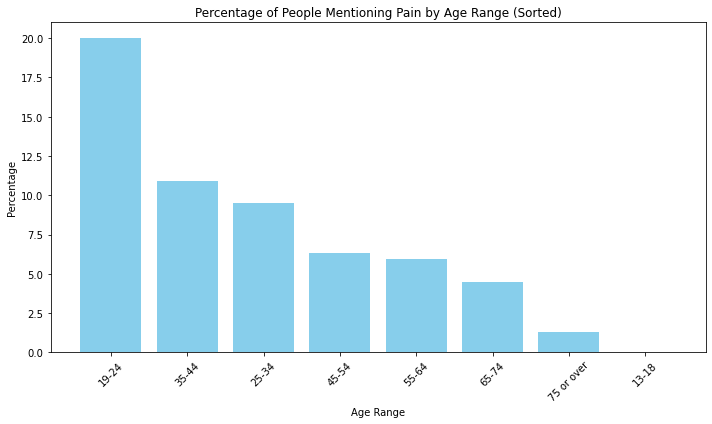

In [109]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
url = 'https://raw.githubusercontent.com/USD-502-FinalProject/ADS599-CapstoneProject/main/reviews.xlsx'
data = pd.read_excel(url)
# Assuming 'data' is your DataFrame
data.dropna(subset=['Age range'], inplace=True)


# Function to check for 'tired', 'tiredness', or 'fatigue' in 'Review Text'
def check_tiredness(text):
    if pd.isnull(text):
        return False
    else:
        text = text.lower()
        return ('pain' in text)

# Mark rows where 'tired', 'tiredness', or 'fatigue' is mentioned
data['Tiredness Mentioned'] = data['Review Text'].apply(check_tiredness)

# Group by 'Age range' and calculate the percentage of people mentioning 'tiredness'
age_ranges = data['Age range'].unique()

percentage_list = []

for age_range in age_ranges:
    if pd.isnull(age_range):
        continue  # Skip NaN or null values in 'Age range'
    
    subset = data[data['Age range'] == age_range]
    total_count = len(subset)
    tired_count = len(subset[subset['Tiredness Mentioned'] == True])
    
    if total_count != 0:
        percentage = (tired_count / total_count) * 100
        percentage_list.append(percentage)
    else:
        percentage_list.append(np.nan)


# Sort percentage_list and age_ranges based on percentage_list values
sorted_indices = np.argsort(percentage_list)[::-1]  # Get indices for sorting in descending order
sorted_percentage = [percentage_list[i] for i in sorted_indices]
sorted_age_ranges = [age_ranges[i] for i in sorted_indices]

# Plotting the sorted chart
plt.figure(figsize=(10, 6))
plt.bar(sorted_age_ranges, sorted_percentage, color='skyblue')
plt.title('Percentage of People Mentioning Pain by Age Range (Sorted)')
plt.xlabel('Age Range')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

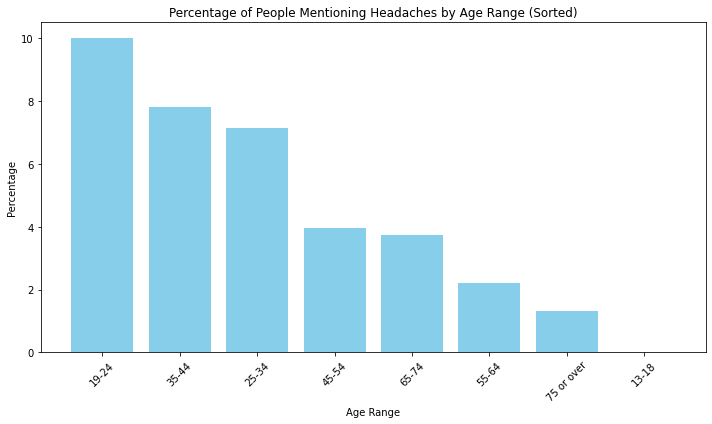

In [108]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
url = 'https://raw.githubusercontent.com/USD-502-FinalProject/ADS599-CapstoneProject/main/reviews.xlsx'
data = pd.read_excel(url)
# Assuming 'data' is your DataFrame
data.dropna(subset=['Age range'], inplace=True)


# Function to check for 'tired', 'tiredness', or 'fatigue' in 'Review Text'
def check_tiredness(text):
    if pd.isnull(text):
        return False
    else:
        text = text.lower()
        return ('headache' in text)

# Mark rows where 'tired', 'tiredness', or 'fatigue' is mentioned
data['Tiredness Mentioned'] = data['Review Text'].apply(check_tiredness)

# Group by 'Age range' and calculate the percentage of people mentioning 'tiredness'
age_ranges = data['Age range'].unique()

percentage_list = []

for age_range in age_ranges:
    if pd.isnull(age_range):
        continue  # Skip NaN or null values in 'Age range'
    
    subset = data[data['Age range'] == age_range]
    total_count = len(subset)
    tired_count = len(subset[subset['Tiredness Mentioned'] == True])
    
    if total_count != 0:
        percentage = (tired_count / total_count) * 100
        percentage_list.append(percentage)
    else:
        percentage_list.append(np.nan)


# Sort percentage_list and age_ranges based on percentage_list values
sorted_indices = np.argsort(percentage_list)[::-1]  # Get indices for sorting in descending order
sorted_percentage = [percentage_list[i] for i in sorted_indices]
sorted_age_ranges = [age_ranges[i] for i in sorted_indices]

# Plotting the sorted chart
plt.figure(figsize=(10, 6))
plt.bar(sorted_age_ranges, sorted_percentage, color='skyblue')
plt.title('Percentage of People Mentioning Headaches by Age Range (Sorted)')
plt.xlabel('Age Range')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

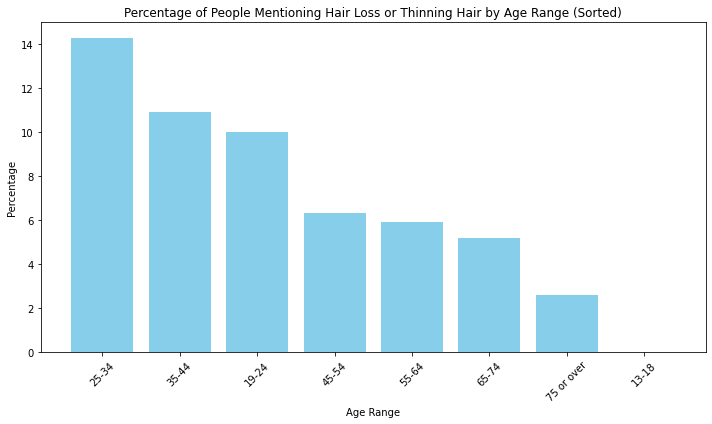

In [107]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
url = 'https://raw.githubusercontent.com/USD-502-FinalProject/ADS599-CapstoneProject/main/reviews.xlsx'
data = pd.read_excel(url)
# Assuming 'data' is your DataFrame
data.dropna(subset=['Age range'], inplace=True)


# Function to check for 'tired', 'tiredness', or 'fatigue' in 'Review Text'
def check_tiredness(text):
    if pd.isnull(text):
        return False
    else:
        text = text.lower()
        return ('hair' in text)

# Mark rows where 'tired', 'tiredness', or 'fatigue' is mentioned
data['Tiredness Mentioned'] = data['Review Text'].apply(check_tiredness)

# Group by 'Age range' and calculate the percentage of people mentioning 'tiredness'
age_ranges = data['Age range'].unique()

percentage_list = []

for age_range in age_ranges:
    if pd.isnull(age_range):
        continue  # Skip NaN or null values in 'Age range'
    
    subset = data[data['Age range'] == age_range]
    total_count = len(subset)
    tired_count = len(subset[subset['Tiredness Mentioned'] == True])
    
    if total_count != 0:
        percentage = (tired_count / total_count) * 100
        percentage_list.append(percentage)
    else:
        percentage_list.append(np.nan)


# Sort percentage_list and age_ranges based on percentage_list values
sorted_indices = np.argsort(percentage_list)[::-1]  # Get indices for sorting in descending order
sorted_percentage = [percentage_list[i] for i in sorted_indices]
sorted_age_ranges = [age_ranges[i] for i in sorted_indices]

# Plotting the sorted chart
plt.figure(figsize=(10, 6))
plt.bar(sorted_age_ranges, sorted_percentage, color='skyblue')
plt.title('Percentage of People Mentioning Hair Loss or Thinning Hair by Age Range (Sorted)')
plt.xlabel('Age Range')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

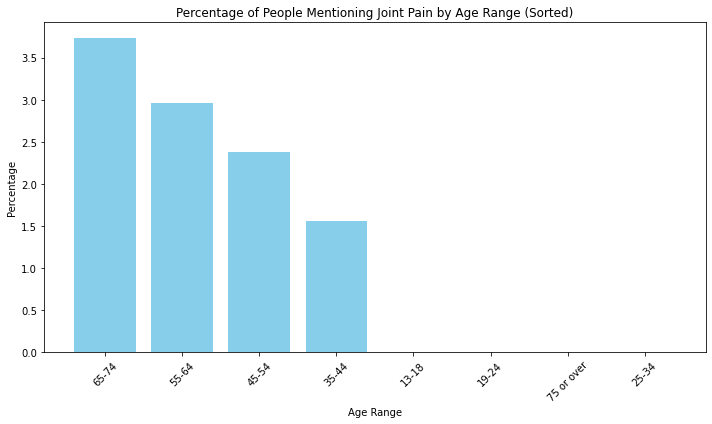

In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
url = 'https://raw.githubusercontent.com/USD-502-FinalProject/ADS599-CapstoneProject/main/reviews.xlsx'
data = pd.read_excel(url)
# Assuming 'data' is your DataFrame
data.dropna(subset=['Age range'], inplace=True)


# Function to check for 'tired', 'tiredness', or 'fatigue' in 'Review Text'
def check_tiredness(text):
    if pd.isnull(text):
        return False
    else:
        text = text.lower()
        return ('joint' in text)

# Mark rows where 'tired', 'tiredness', or 'fatigue' is mentioned
data['Tiredness Mentioned'] = data['Review Text'].apply(check_tiredness)

# Group by 'Age range' and calculate the percentage of people mentioning 'tiredness'
age_ranges = data['Age range'].unique()

percentage_list = []

for age_range in age_ranges:
    if pd.isnull(age_range):
        continue  # Skip NaN or null values in 'Age range'
    
    subset = data[data['Age range'] == age_range]
    total_count = len(subset)
    tired_count = len(subset[subset['Tiredness Mentioned'] == True])
    
    if total_count != 0:
        percentage = (tired_count / total_count) * 100
        percentage_list.append(percentage)
    else:
        percentage_list.append(np.nan)


# Sort percentage_list and age_ranges based on percentage_list values
sorted_indices = np.argsort(percentage_list)[::-1]  # Get indices for sorting in descending order
sorted_percentage = [percentage_list[i] for i in sorted_indices]
sorted_age_ranges = [age_ranges[i] for i in sorted_indices]

# Plotting the sorted chart
plt.figure(figsize=(10, 6))
plt.bar(sorted_age_ranges, sorted_percentage, color='skyblue')
plt.title('Percentage of People Mentioning Joint Pain by Age Range (Sorted)')
plt.xlabel('Age Range')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

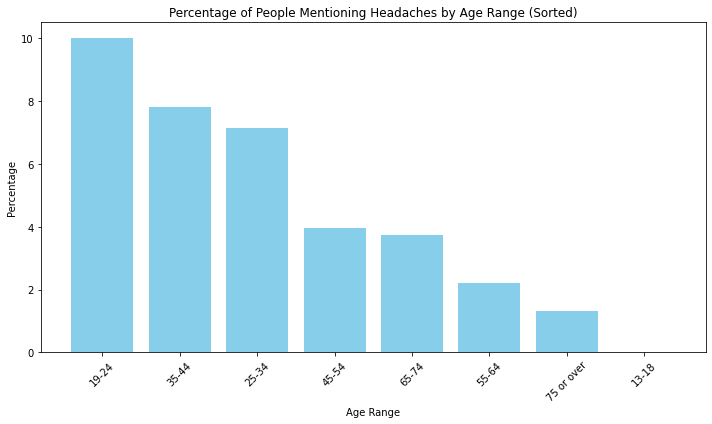

In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
url = 'https://raw.githubusercontent.com/USD-502-FinalProject/ADS599-CapstoneProject/main/reviews.xlsx'
data = pd.read_excel(url)
# Assuming 'data' is your DataFrame
data.dropna(subset=['Age range'], inplace=True)


# Function to check for 'tired', 'tiredness', or 'fatigue' in 'Review Text'
def check_tiredness(text):
    if pd.isnull(text):
        return False
    else:
        text = text.lower()
        return ('headache' in text) or ('headaches' in text)

# Mark rows where 'tired', 'tiredness', or 'fatigue' is mentioned
data['Tiredness Mentioned'] = data['Review Text'].apply(check_tiredness)

# Group by 'Age range' and calculate the percentage of people mentioning 'tiredness'
age_ranges = data['Age range'].unique()

percentage_list = []

for age_range in age_ranges:
    if pd.isnull(age_range):
        continue  # Skip NaN or null values in 'Age range'
    
    subset = data[data['Age range'] == age_range]
    total_count = len(subset)
    tired_count = len(subset[subset['Tiredness Mentioned'] == True])
    
    if total_count != 0:
        percentage = (tired_count / total_count) * 100
        percentage_list.append(percentage)
    else:
        percentage_list.append(np.nan)


# Sort percentage_list and age_ranges based on percentage_list values
sorted_indices = np.argsort(percentage_list)[::-1]  # Get indices for sorting in descending order
sorted_percentage = [percentage_list[i] for i in sorted_indices]
sorted_age_ranges = [age_ranges[i] for i in sorted_indices]

# Plotting the sorted chart
plt.figure(figsize=(10, 6))
plt.bar(sorted_age_ranges, sorted_percentage, color='skyblue')
plt.title('Percentage of People Mentioning Headaches by Age Range (Sorted)')
plt.xlabel('Age Range')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

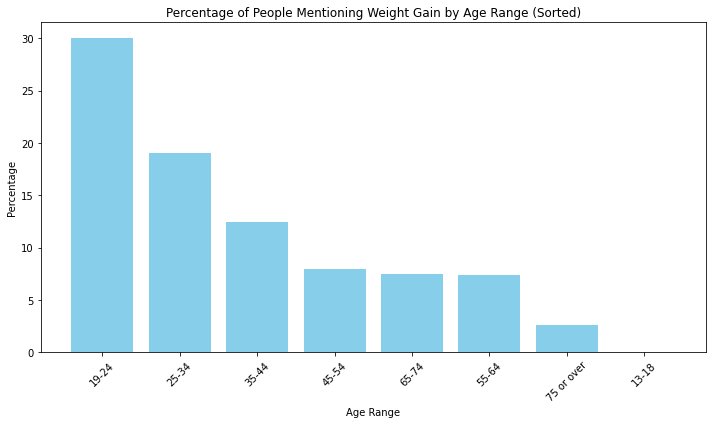

In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
url = 'https://raw.githubusercontent.com/USD-502-FinalProject/ADS599-CapstoneProject/main/reviews.xlsx'
data = pd.read_excel(url)
# Assuming 'data' is your DataFrame
data.dropna(subset=['Age range'], inplace=True)


# Function to check for 'tired', 'tiredness', or 'fatigue' in 'Review Text'
def check_tiredness(text):
    if pd.isnull(text):
        return False
    else:
        text = text.lower()
        return ('weight' in text) or ('lbs' in text) or ('gain' in text)

# Mark rows where 'tired', 'tiredness', or 'fatigue' is mentioned
data['Tiredness Mentioned'] = data['Review Text'].apply(check_tiredness)

# Group by 'Age range' and calculate the percentage of people mentioning 'tiredness'
age_ranges = data['Age range'].unique()

percentage_list = []

for age_range in age_ranges:
    if pd.isnull(age_range):
        continue  # Skip NaN or null values in 'Age range'
    
    subset = data[data['Age range'] == age_range]
    total_count = len(subset)
    tired_count = len(subset[subset['Tiredness Mentioned'] == True])
    
    if total_count != 0:
        percentage = (tired_count / total_count) * 100
        percentage_list.append(percentage)
    else:
        percentage_list.append(np.nan)


# Sort percentage_list and age_ranges based on percentage_list values
sorted_indices = np.argsort(percentage_list)[::-1]  # Get indices for sorting in descending order
sorted_percentage = [percentage_list[i] for i in sorted_indices]
sorted_age_ranges = [age_ranges[i] for i in sorted_indices]

# Plotting the sorted chart
plt.figure(figsize=(10, 6))
plt.bar(sorted_age_ranges, sorted_percentage, color='skyblue')
plt.title('Percentage of People Mentioning Weight Gain by Age Range (Sorted)')
plt.xlabel('Age Range')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

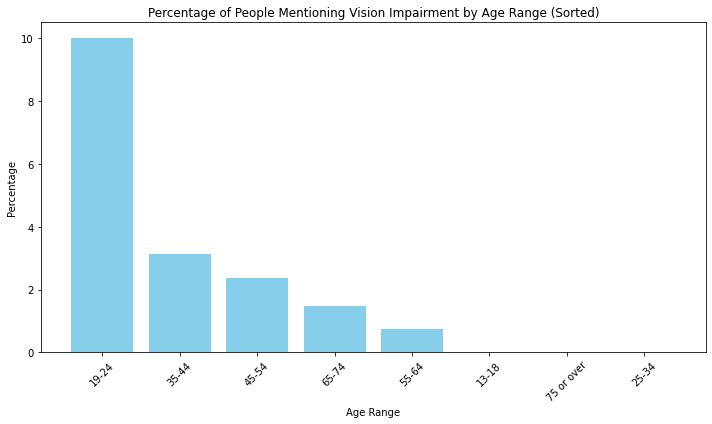

In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
url = 'https://raw.githubusercontent.com/USD-502-FinalProject/ADS599-CapstoneProject/main/reviews.xlsx'
data = pd.read_excel(url)
# Assuming 'data' is your DataFrame
data.dropna(subset=['Age range'], inplace=True)


# Function to check for 'tired', 'tiredness', or 'fatigue' in 'Review Text'
def check_tiredness(text):
    if pd.isnull(text):
        return False
    else:
        text = text.lower()
        return ('vision' in text)

# Mark rows where 'tired', 'tiredness', or 'fatigue' is mentioned
data['Tiredness Mentioned'] = data['Review Text'].apply(check_tiredness)

# Group by 'Age range' and calculate the percentage of people mentioning 'tiredness'
age_ranges = data['Age range'].unique()

percentage_list = []

for age_range in age_ranges:
    if pd.isnull(age_range):
        continue  # Skip NaN or null values in 'Age range'
    
    subset = data[data['Age range'] == age_range]
    total_count = len(subset)
    tired_count = len(subset[subset['Tiredness Mentioned'] == True])
    
    if total_count != 0:
        percentage = (tired_count / total_count) * 100
        percentage_list.append(percentage)
    else:
        percentage_list.append(np.nan)


# Sort percentage_list and age_ranges based on percentage_list values
sorted_indices = np.argsort(percentage_list)[::-1]  # Get indices for sorting in descending order
sorted_percentage = [percentage_list[i] for i in sorted_indices]
sorted_age_ranges = [age_ranges[i] for i in sorted_indices]

# Plotting the sorted chart
plt.figure(figsize=(10, 6))
plt.bar(sorted_age_ranges, sorted_percentage, color='skyblue')
plt.title('Percentage of People Mentioning Vision Impairment by Age Range (Sorted)')
plt.xlabel('Age Range')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

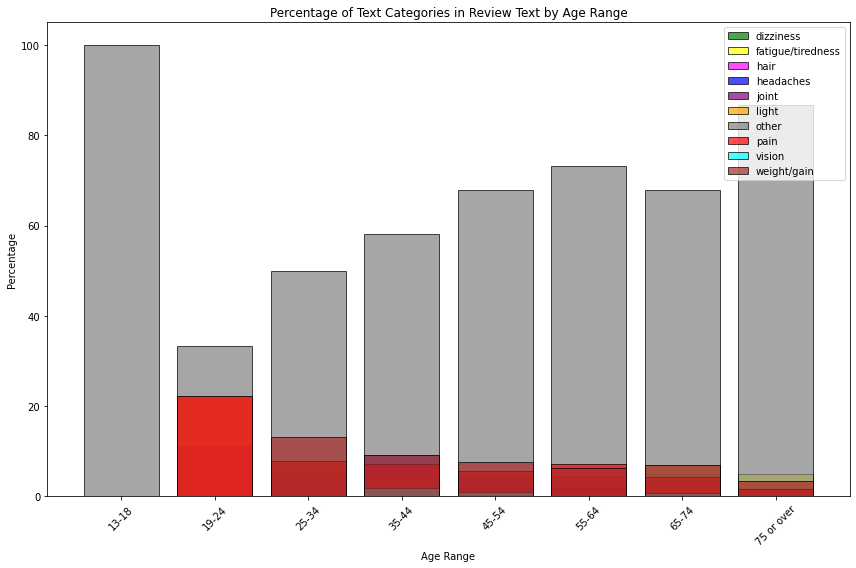

In [116]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
url = 'https://raw.githubusercontent.com/USD-502-FinalProject/ADS599-CapstoneProject/main/reviews.xlsx'
data = pd.read_excel(url)

# Drop rows with null values in 'Age range' column
data.dropna(subset=['Age range', 'Review Text'], inplace=True)

# Function to categorize strings and assign colors
def categorize_string(text):
    text = text.lower()
    if 'headaches' in text:
        return 'headaches'
    elif 'light' in text:
        return 'light'
    elif 'dizz' in text:
        return 'dizziness'
    elif 'pain' in text:
        return 'pain'
    elif 'joint' in text:
        return 'joint'
    elif 'weight' in text or 'gain' in text:
        return 'weight/gain'
    elif 'vision' in text:
        return 'vision'
    elif 'hair' in text:
        return 'hair'
    elif 'fatigue' in text or 'tired' in text or 'tiredness' in text:
        return 'fatigue/tiredness'
    else:
        return 'other'

# Apply the categorization function to create a new column 'Text Category'
data['Text Category'] = data['Review Text'].apply(categorize_string)

# Group by 'Age range' and 'Text Category', then count the occurrences
grouped = data.groupby(['Age range', 'Text Category']).size().unstack(fill_value=0)
grouped_percentage = grouped.div(grouped.sum(axis=1), axis=0) * 100  # Calculate percentages

# Plotting the bar chart
plt.figure(figsize=(12, 8))

# Define colors for each text category
colors = {
    'headaches': 'blue',
    'light': 'orange',
    'dizziness': 'green',
    'pain': 'red',
    'joint': 'purple',
    'weight/gain': 'brown',
    'vision': 'cyan',
    'hair': 'magenta',
    'fatigue/tiredness': 'yellow',
    'other': 'gray'
}

# Plot bars for each text category per age range
for category in grouped_percentage.columns:
    plt.bar(
        grouped_percentage.index,
        grouped_percentage[category],
        label=category,
        color=colors[category],
        alpha=0.7,
        edgecolor='black'
    )

plt.title('Percentage of Text Categories in Review Text by Age Range')
plt.xlabel('Age Range')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


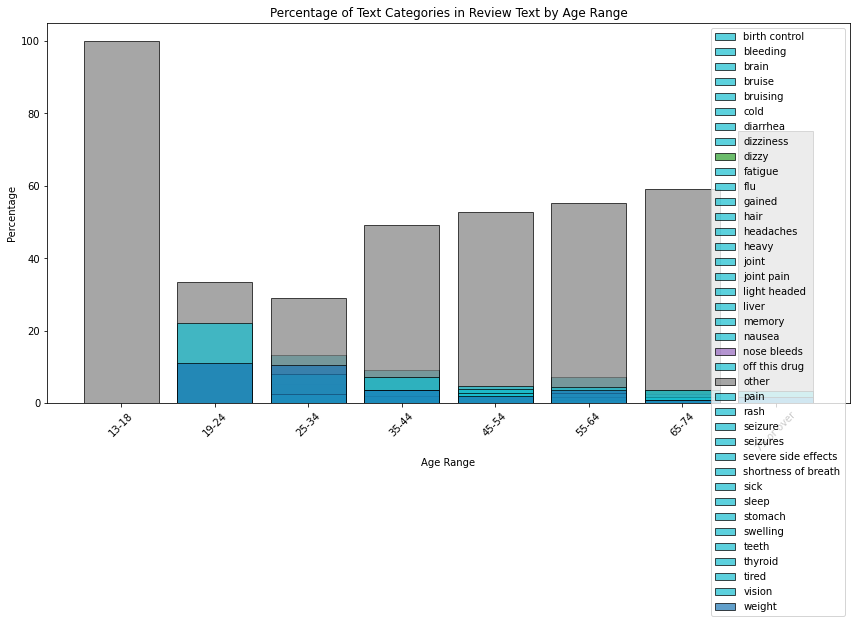

In [118]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
url = 'https://raw.githubusercontent.com/USD-502-FinalProject/ADS599-CapstoneProject/main/reviews.xlsx'
data = pd.read_excel(url)

# Drop rows with null values in 'Age range' column
data.dropna(subset=['Age range', 'Review Text'], inplace=True)

# Symptoms list
symptoms = [
    'weight', 'lost weight', 'dizzy', 'dizzy spells', 'nose bleeds', 'blurry', 'blurry vision', 'joint/muscle pain',
    'headaches', 'joint pain', 'joint', 'pain', 'headaches', 'bruise', 'bruises', 'bruising', 'rash', 'nauseousness',
    'swelling', 'went away', 'fatigue', 'upset stomach', 'stomach', 'heartburn', 'ulcer', 'severe side effects',
    'birth control', 'sick', 'shaky', 'seizures', 'seizure', 'migraine', 'migraines', 'lightheadedness', 'light headed',
    'light headedness', 'shortness of breath', 'weight gain', 'gained weight', 'hair', 'teeth', 'memory', 'liver', 'hated',
    'losing my hair', 'thyroid', 'extreme tireness', 'tired', 'tiredness', 'cold', 'flu', 'bleeding', 'brain', 'gained',
    'lbs', 'diarrhea', 'chill', 'appetite', 'loss of appetite', 'bleeding gums', 'heavy', 'heavy periods', 'periods',
    'chills', 'tremors', 'tremours', 'muscle', 'anxious', 'anxioius', 'sleep', 'naseous', 'tired all the time',
    'off this drug', 'nausea', 'vomiting', 'vomit', 'constipation', 'vision', 'vision loss', 'hair thinning',
    'thinning hair', 'dizziness'
]

# Function to categorize strings based on symptoms list
def categorize_string(text):
    text = text.lower()
    for symptom in symptoms:
        if symptom in text:
            return symptom
    return 'other'

# Apply the categorization function to create a new column 'Text Category'
data['Text Category'] = data['Review Text'].apply(categorize_string)

# Group by 'Age range' and 'Text Category', then count the occurrences
grouped = data.groupby(['Age range', 'Text Category']).size().unstack(fill_value=0)
grouped_percentage = grouped.div(grouped.sum(axis=1), axis=0) * 100  # Calculate percentages

# Plotting the bar chart
plt.figure(figsize=(12, 8))

# Define colors for each text category
colors = {
    symptom: plt.cm.tab10(i) for i, symptom in enumerate(symptoms)
}

# Plot bars for each text category per age range
for category in grouped_percentage.columns:
    plt.bar(
        grouped_percentage.index,
        grouped_percentage[category],
        label=category,
        color=colors.get(category, 'gray'),  # Assign gray color for 'other'
        alpha=0.7,
        edgecolor='black'
    )

plt.title('Percentage of Text Categories in Review Text by Age Range')
plt.xlabel('Age Range')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


In [119]:
import pandas as pd

# Load the dataset
url = 'https://raw.githubusercontent.com/USD-502-FinalProject/ADS599-CapstoneProject/main/reviews.xlsx'
data = pd.read_excel(url)

# Filter rows with 'Age range' of '65-74' and display 'Review Text'
age_65_to_74_reviews = data[data['Age range'] == '65-74']['Review Text']

# Print the 'Review Text' values
for review in age_65_to_74_reviews:
    print(review)


Headache,gum pain,nausea,muscle pain,hair loss,tingling in bottom of feets,feet, out doing sleep,would like to know if any one else is having this especially the chest pain
Gradually lost color vision to a cloudy pastel.  Was unknown till i had to stop for four days and color vision came back. Lost color vision when started again.  I stopped taking it on my own. When i went to my opthamologist i found i had an enlarged optin nerve.  Research indicated that enlarged optic nerve is a noted side effect of cumiden.
Some rectal bleeding. Not good st tsking at same time. I use the generic equivalent.
I've been on this drug for 20 years - Antiphosfolipid   Antibodies Syndrome.  Have had three clots - arm leg and heart.  Have had many side effects including hair loss, memory loss, fatigue, and brusing.  Now that I can test at home, life is much easier.  Watching vitamin K is difficult but necessary.  All in all, I've learned to live with it and still enjoy life!
very effective drug.  Difficult

### Gender Distribution

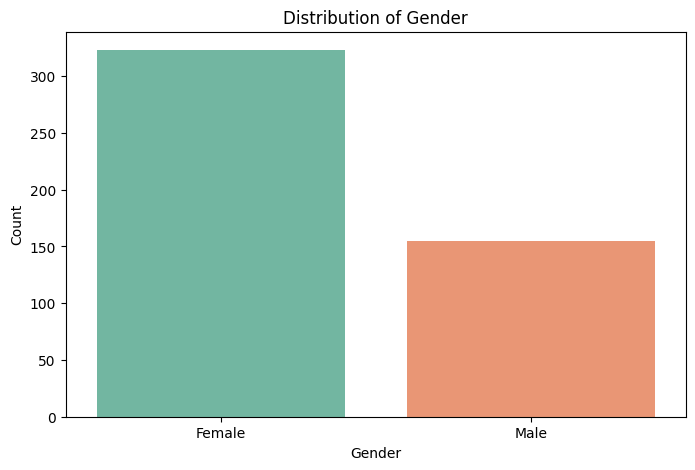

In [88]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Gender', data=df, palette='Set2')
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

### Distribution of Thumbs Up and Thumbs Down


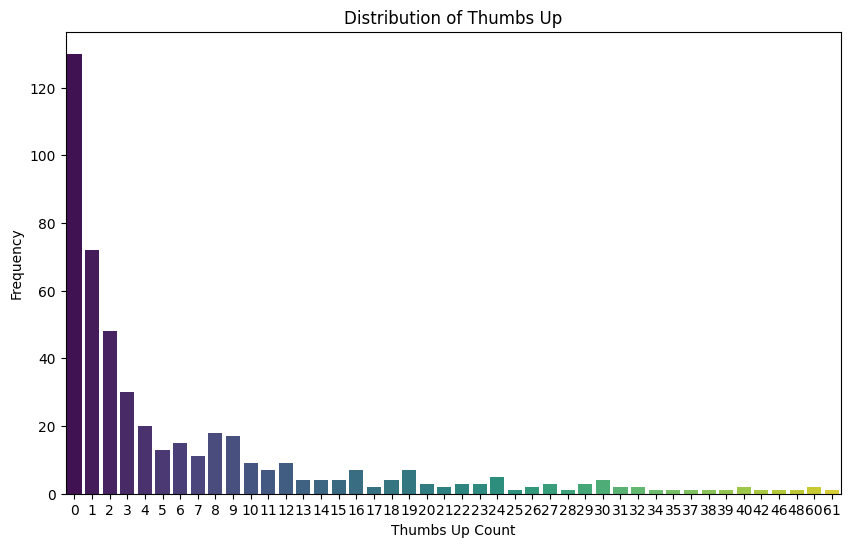

In [89]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Thumbs Up', data=df, palette='viridis')
plt.title('Distribution of Thumbs Up')
plt.xlabel('Thumbs Up Count')
plt.ylabel('Frequency')
plt.show()

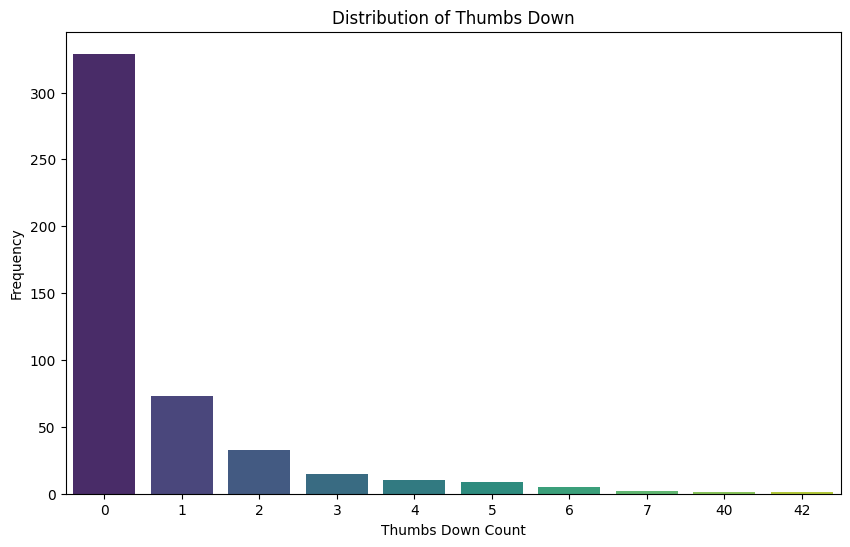

In [90]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Thumbs Down', data=df, palette='viridis')
plt.title('Distribution of Thumbs Down')
plt.xlabel('Thumbs Down Count')
plt.ylabel('Frequency')
plt.show()

### Review Length analysis

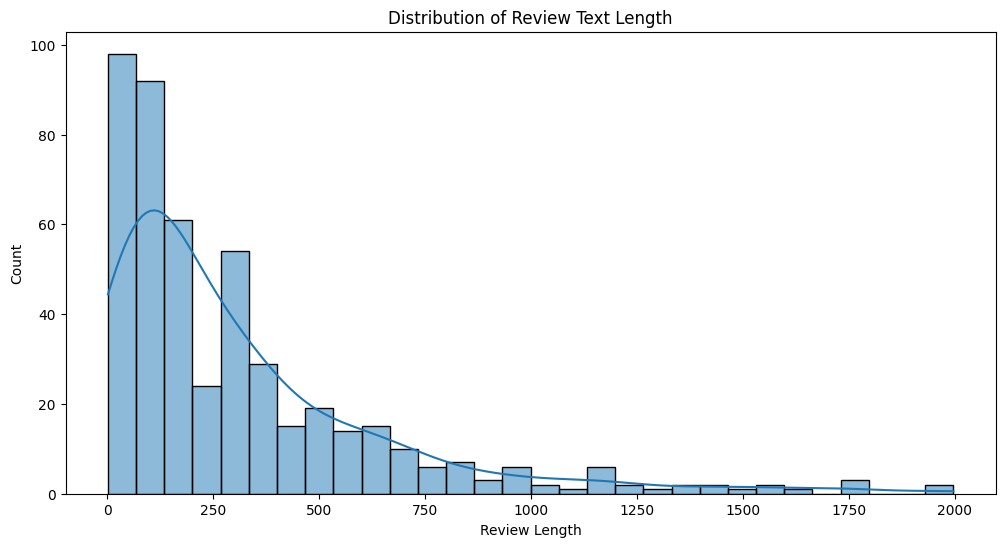

In [91]:
# Distribution of Review Text Length
df['Review Length'] = df['Review Text'].apply(len)

plt.figure(figsize=(12, 6))
sns.histplot(df['Review Length'], bins=30, kde=True)
plt.title('Distribution of Review Text Length')
plt.xlabel('Review Length')
plt.ylabel('Count')
plt.show()

### Timeline analysis

C:\Users\Awais Nayyar\AppData\Local\Temp\ipykernel_416\2884670066.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Date', y='Total Thumbs/Votes', data=df, estimator='sum', ci=None)


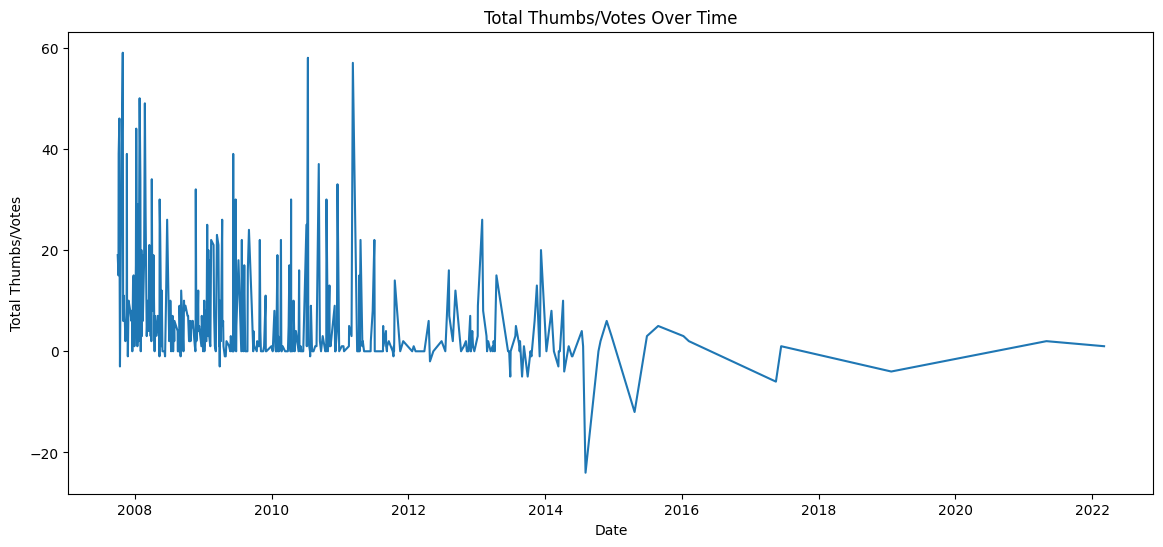

In [92]:
# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Distribution of reviews over time
plt.figure(figsize=(14, 6))
sns.lineplot(x='Date', y='Total Thumbs/Votes', data=df, estimator='sum', ci=None)
plt.title('Total Thumbs/Votes Over Time')
plt.xlabel('Date')
plt.ylabel('Total Thumbs/Votes')
plt.show()

### EDA on all numerical columns

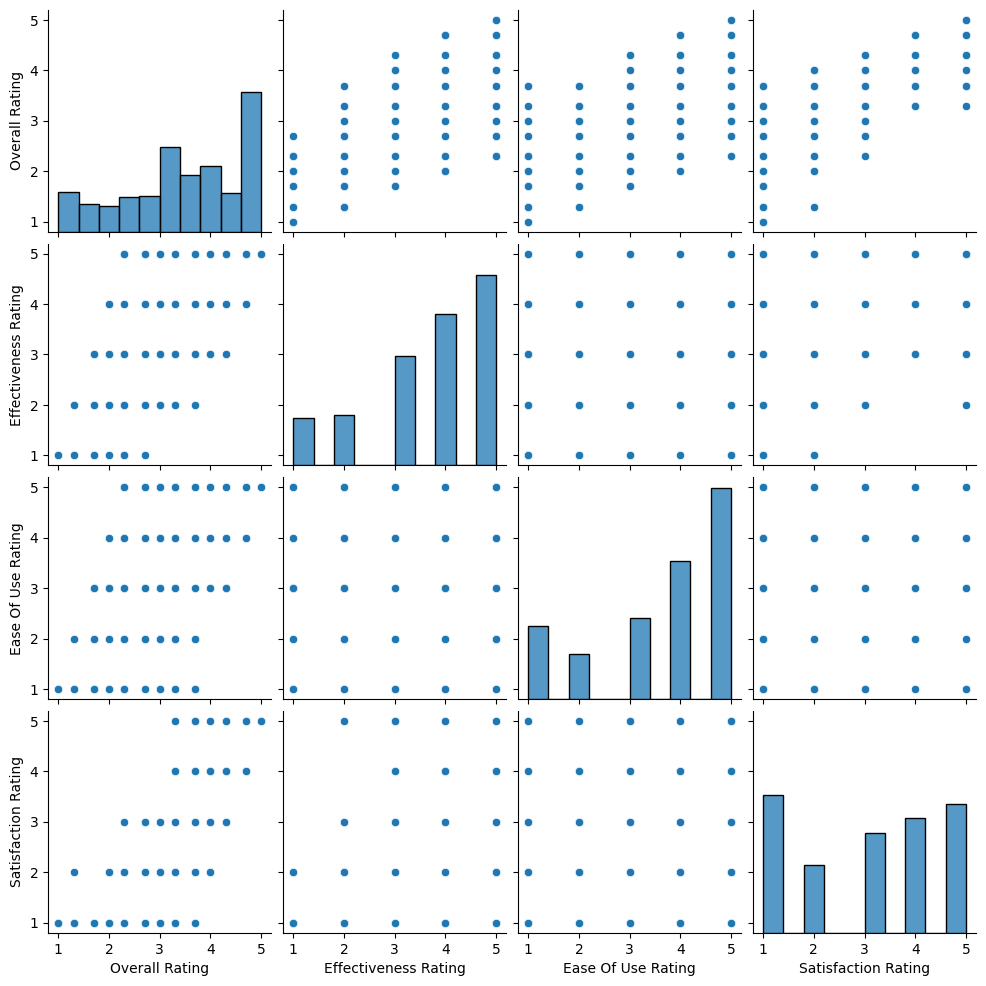

In [93]:
sns.pairplot(df[['Overall Rating', 'Effectiveness Rating', 'Ease Of Use Rating', 'Satisfaction Rating']])
plt.show()

### Label Encoding 

In [96]:
age_mapping = {
    '13-18': 16,
    '19-24': 22,
    '25-34': 30,
    '35-44': 40,
    '45-54': 50,
    '55-64': 60,
    '65-74': 70,
    '75 or over': 80
}

df['Age range'] = df['Age range'].map(age_mapping)

# Convert the 'Age range' column to integers
df['Age range'] = df['Age range'].astype(int)

label_encoder = LabelEncoder()

# Fit and transform the 'Gender' column
df['Gender'] = label_encoder.fit_transform(df['Gender'].astype(str))
df['Medication Timeline'] = label_encoder.fit_transform(df['Medication Timeline'])
df['Condition'] = label_encoder.fit_transform(df['Condition'])

### Modelling

In [99]:
topic_list=[]
df_list=[]
l=[]
def get_topic(text):
    f = open("temp.txt", "w")   #reading the temp file
    f.write(text) #writing the review in the file
    f.close()
    mdl = tp.LDAModel(k=3)       #model creation, k=number_of_topic(for which you want to train your model)
    for line in open('temp.txt'):
        mdl.add_doc(line.strip().split())   #adding corpus to model
    for i in range(0, 200, 10):
        mdl.train(10)    #train our model
    for k in range(mdl.k):
        topics=mdl.get_topic_words(k, top_n=5)  #getting desired number of topics from trained model K=number_of_topics
#         print(topics)
        return topics

In [100]:
df['Topics']=df['Cleaned Text'].apply(lambda x:((get_topic(x))))

In [101]:
df['Topics']=df['Topics'].apply(lambda x:nt.remove_special_characters(str(x)))

In [102]:
df['Topics']=df['Topics'].apply(lambda x:nt.remove_numbers(str(x)))

In [103]:
df['Topics']=df['Topics'].apply(lambda x:','.join(x.split()))

In [106]:
# Create the CountVectorizer object
vectorizer = CountVectorizer()

# Fit and transform the documents
X = vectorizer.fit_transform(df['Cleaned Text'])

In [107]:
# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# Get the cluster centroids and labels
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

C:\Users\Awais Nayyar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [108]:
df['cluster'] = 0

In [109]:
# Use the fitted KMeans model to predict the cluster for the new data point
for i in range(X.shape[0]):
    predicted_cluster = kmeans.predict(X[i])
    df.loc[i,'cluster'] = predicted_cluster[0]
#     print(f"New data point belongs to Cluster {predicted_cluster[0]}")


In [110]:
y = df['cluster']

In [111]:
X = df[['Age range', 'Gender', 'Medication Timeline', 'Condition']]

In [117]:
X['Age range'].fillna(X['Age range'].mean(), inplace = True)
X['Gender'].fillna(X['Gender'].mean(), inplace = True)
X['Medication Timeline'].fillna(X['Medication Timeline'].mean(), inplace = True)
X['Condition'].fillna(X['Condition'].mean(), inplace = True)

C:\Users\Awais Nayyar\AppData\Local\Temp\ipykernel_416\1285792202.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Age range'].fillna(X['Age range'].mean(), inplace = True)
C:\Users\Awais Nayyar\AppData\Local\Temp\ipykernel_416\1285792202.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Gender'].fillna(X['Gender'].mean(), inplace = True)
C:\Users\Awais Nayyar\AppData\Local\Temp\ipykernel_416\1285792202.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#re

In [118]:
# Importing Models
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import svm
# Importing Evaluation matrces
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,classification_report

# check the performance on diffrent regressor
models = []
models.append(('Support Vector Classifier', svm.SVC()))
models.append(('LogisitcRegression', LogisticRegression()))
models.append(('KNeighborsClassifier', KNeighborsClassifier()))
models.append(('RandomForestClassifier', RandomForestClassifier()))
models.append(('AdaBoostClassifier', AdaBoostClassifier()))
models.append(('DecisionTreeClassifier', DecisionTreeClassifier()))


# prepare the cross-validation procedure
cv = KFold(n_splits=5, random_state=1, shuffle=True)

# metrices to store performance
acc = []
pre = []
f1 = []
con = []
rec = []


import time
i = 0
for name,model in models:
    i = i+1
    start_time = time.time()
    
    # Fitting model to the Training set
    clf = model
    clf.fit(X_train, y_train)
    
    # predict values
    y_pred = clf.predict(X_test)
    
    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    acc.append(accuracy)
    # Precision
    precision = precision_score(y_test, y_pred, average=None)
    pre.append(precision)
    # Recall
    recall = recall_score(y_test, y_pred, average=None)
    rec.append(recall)
    # F1 Score
    f1_sco = f1_score(y_test, y_pred, average=None)
    f1.append(f1_sco)
    # Confusion Matrix
    confusion_mat = confusion_matrix(y_test, y_pred)
    con.append(confusion_mat)
    # Report
    report = classification_report(y_test, y_pred)
    
    # evaluate model
    scores = cross_val_score(clf, X, y, cv=cv, n_jobs=-1)



    print("+","="*100,"+")
    print('\033[1m' + f"\t\t\t{i}-For {name} The Performance result is: " + '\033[0m')
    print("+","="*100,"+")
    print('Accuracy : ', accuracy)   
    print("-"*50)
    print('F1 : ', f1_sco)
    print("-"*50)
    print('Reacll : ', recall)
    print("-"*50)
    print('Precision : ', precision)
    print("-"*50)
    print('cross validation accuracy : ', np.mean(scores))
    print("-"*50)
    print('Confusion Matrix....\n', confusion_mat)
    print("-"*50)
    print('Classification Report....\n', report)
    print("-"*50)
    print('Plotting Confusion Matrix...\n')
#     plot_confusion_matrix(clf, X_test, y_test)
    plt.show()


    
    print("\t\t\t\t\t\t\t-----------------------------------------------------------")
    print(f"\t\t\t\t\t\t\t Time for detection ({name}) : {round((time.time() - start_time), 3)} seconds...")
    print("\t\t\t\t\t\t\t-----------------------------------------------------------")
    print()
    
pd.DataFrame({"Model": dict(models).keys(), "Accuracy": acc, "Precision": pre, "Recall": rec, "F1_Score": f1, "Confusion Matrix": con})

C:\Users\Awais Nayyar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Awais Nayyar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Awais Nayyar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(

+ ==================================================================================================== +
			1-For Support Vector Classifier The Performance result is: 
+ ==================================================================================================== +
Accuracy :  0.777027027027027
--------------------------------------------------
F1 :  [0.         0.87452471 0.        ]
--------------------------------------------------
Reacll :  [0. 1. 0.]
--------------------------------------------------
Precision :  [0.         0.77702703 0.        ]
--------------------------------------------------
cross validation accuracy :  0.7936333855576129
--------------------------------------------------
Confusion Matrix....
 [[  0  31   0]
 [  0 115   0]
 [  0   2   0]]
--------------------------------------------------
Classification Report....
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        31
         1.0       0.78      

C:\Users\Awais Nayyar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Awais Nayyar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Awais Nayyar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classificatio

+ ==================================================================================================== +
			3-For KNeighborsClassifier The Performance result is: 
+ ==================================================================================================== +
Accuracy :  0.7702702702702703
--------------------------------------------------
F1 :  [0.29787234 0.86639676 0.        ]
--------------------------------------------------
Reacll :  [0.22580645 0.93043478 0.        ]
--------------------------------------------------
Precision :  [0.4375     0.81060606 0.        ]
--------------------------------------------------
cross validation accuracy :  0.7699615439396097
--------------------------------------------------
Confusion Matrix....
 [[  7  24   0]
 [  8 107   0]
 [  1   1   0]]
--------------------------------------------------
Classification Report....
               precision    recall  f1-score   support

         0.0       0.44      0.23      0.30        31
         

C:\Users\Awais Nayyar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Awais Nayyar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Awais Nayyar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(

+ ==================================================================================================== +
			4-For RandomForestClassifier The Performance result is: 
+ ==================================================================================================== +
Accuracy :  0.722972972972973
--------------------------------------------------
F1 :  [0.17021277 0.8340081  0.        ]
--------------------------------------------------
Reacll :  [0.12903226 0.89565217 0.        ]
--------------------------------------------------
Precision :  [0.25       0.78030303 0.        ]
--------------------------------------------------
cross validation accuracy :  0.749636803874092
--------------------------------------------------
Confusion Matrix....
 [[  4  27   0]
 [ 12 103   0]
 [  0   2   0]]
--------------------------------------------------
Classification Report....
               precision    recall  f1-score   support

         0.0       0.25      0.13      0.17        31
         

Model  Accuracy  \
0  Support Vector Classifier  0.777027   
1         LogisitcRegression  0.770270   
2       KNeighborsClassifier  0.770270   
3     RandomForestClassifier  0.722973   
4         AdaBoostClassifier  0.770270   
5     DecisionTreeClassifier  0.702703   

                                       Precision  \
0                  [0.0, 0.777027027027027, 0.0]   
1                 [0.0, 0.7755102040816326, 0.0]   
2              [0.4375, 0.8106060606060606, 0.0]   
3                [0.25, 0.7803030303030303, 0.0]   
4  [0.3333333333333333, 0.7847222222222222, 0.0]   
5               [0.2727272727272727, 0.784, 0.0]   

                                           Recall  \
0                                 [0.0, 1.0, 0.0]   
1                   [0.0, 0.991304347826087, 0.0]   
2  [0.22580645161290322, 0.9304347826086956, 0.0]   
3  [0.12903225806451613, 0.8956521739130435, 0.0]   
4  [0.03225806451612903, 0.9826086956521739, 0.0]   
5   [0.1935483870967742, 0.8521739130434782, 0.0]   

                                         F1_Score  \
0                  [0.0, 0.8745247148288973, 0.0]   
1                  [0.0, 0.8702290076335878, 0.0]   
2   [0.2978723404255319, 0.8663967611336032, 0.0]   
3   [0.1702127659574468, 0.8340080971659919, 0.0]   
4   [0.0588235294117647, 0.8725868725868725, 0.0]   
5  [0.22641509433962262, 0.8166666666666667, 0.0]   

                        Confusion Matrix  
0   [[0, 31, 0], [0, 115, 0], [0, 2, 0]]  
1   [[0, 31, 0], [1, 114, 0], [0, 2, 0]]  
2   [[7, 24, 0], [8, 107, 0], [1, 1, 0]]  
3  [[4, 27, 0], [12, 103, 0], [0, 2, 0]]  
4   [[1, 29, 1], [2, 113, 0], [0, 2, 0]]  
5   [[6, 25, 0], [16, 98, 1], [0, 2, 0]]